# **Disciplina CAT010** - Aplicações dos Satélites em Ciências Atmosféricas


---

## **Aula Prática 3 - Parte 1:** $\underline{Plotando\ Precipitação\ do\ Produto\ MERGE}$
---
**OBJETIVO:** Nesta aula prática aprenderemos como trabalhar com dados de precipitação estimado por satélite. Para isto usaremos os dados do produto MERGE disponibilizado pelo [CPTEC-INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/). Mais informações sobre o **MERGE** são encontradas no [site](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/READ_ME-MERGE.pdf) do FTP do CPTEC.

---


**DADOS DE ENTRADA**: Arquivos de precipitação.

1. $\underline{Dados\ horários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_2022090100.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/)

    ----------

2. $\underline{Dados\ diários}$:
- **Tipo do dado:** matriz de 701 linhas x 701 colunas
- **Formato do dado:** arquivo grib
- **Nome do arquivo:** MERGE_CPTEC_20220801.grib2
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/)

    ----------

3. $\underline{Dados\ mensais}$:
- **Tipo do dado:** matriz de 691 linhas x 474 colunas
- **Formato do dado:** arquivo NETCDF
- **Nome do arquivo:** MERGE_CPTEC_acum_apr_2004.nc
- **Fonte dos dados:** FTP do [CPTEC/INPE](http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/)


---

**DADOS DE SAÍDA:**
- **Tipo do dado:** Figura
- **Formato do dado:** arquivos PNG
- **Imagens geradas:**
    1. Fig_1_MERGE_horaria_20210101_1700.png
    2. Fig_2a_MERGE_diaria_max_med_acu_20210901_20210910.png
    3. Fig_2b_MERGE_diaria_acu_20210901_20210910.png
    4. Fig_3_MERGE_mensal_2021dec.png
    5. Fig_4a_MERGE_por_ano.png
    6. Fig_4b_MERGE_por_ano.png
    7. Fig_5_MERGE_media_anual.png
    8. Fig_6_MERGE_media_sazonal.png
    9. Fig_7_MERGE_media_mensal.png




---

**PROCEDIMENTO REALIZADO:** Os seguintes procedimentos são realizados nesse código:
1.   Instalação de bibliotecas
2.   Monta o google drive
3.   Define o caminho do google drive
4.   Importação das bibliotecas
5.   Download dos shapefiles
6.   Precipitação por hora
7.   Precipitação por dia
8.   Precipitação por mês
9.   Climatologia


---
**OBSERVAÇÕES IMPORTANTES**:
1. Fazer mudanças, veja em: **### >>> MUDANÇAS AQUI <<< ###**
    - 1. Caminho do seu drive

---
- **Realizado por:** Enrique V. Mattos - 01/09/2022
- **Atualizado por:** Enrique V. Mattos - 03/10/2023


---


# **1° Passo:** Instalando as bibliotecas

In [ ]:
# Instalando o proplot (usado para gerar Mapas também)
!pip install -q proplot

# Instalando o cartopy (usado para gerar Mapas)
!pip uninstall shapely --yes
!pip install -q shapely cartopy==0.21.1 --no-binary shapely --no-binary cartopy
!wget https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
!python cartopy_feature_download.py physical

Found existing installation: shapely 2.0.1
Uninstalling shapely-2.0.1:
  Successfully uninstalled shapely-2.0.1
--2023-10-03 14:12:58--  https://raw.githubusercontent.com/SciTools/cartopy/master/tools/cartopy_feature_download.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6332 (6.2K) [text/plain]
Saving to: ‘cartopy_feature_download.py.1’

cartopy_feature_dow 100%[===================>]   6.18K  --.-KB/s    in 0s      

2023-10-03 14:12:58 (69.3 MB/s) - ‘cartopy_feature_download.py.1’ saved [6332/6332]

Feature physical, coastline, 110m length: 134
Feature physical, coastline, 50m length: 1428
Feature physical, coastline, 10m length: 4133
Feature physical, land, 110m length: 127
Feature physical, land, 50m length: 1420
Feature physical, land, 10m length: 

Chegando aqui, será necessário fazer a **Reinicialização do Ambiente de Execução** (acessar *Ambiente de execução* que esta na barra de ferramentas e clicar em *Reiniciar Ambiente de Execução* e rodar novamente a célula anterior de instalações) e ter que instalar todos os pacotes de novo. Isso é necessário tanto para poder usar sem problemas o `Proplot` quanto o `CartoPy` na nossa sessão do Colab, então a partir desse ponto não teremos mais que nos preocupar com a preparação do ambiente virtual.

In [ ]:
# Instalando a Pygrib
!pip install -q pygrib
print('\n')

# foi usado devido ao pygrib não funcionar com a versão padrão do colab
!pip install -U numpy

# Restarting the Runtime programatically (needed for the numpy upgrade)
try:
  from gem.utils import graph_util, plot_util
except (ImportError, KeyError, ModuleNotFoundError):
  print('Restarting RUNTIME...')
  exit()
  print('\n')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 46.2 MB/s eta 0:00:00


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 47.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mizani 0.9.3 requires matplotlib>=3.5.0, but you have matplotlib 3.4.3 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.26.0 which is incompatible.
plotnine 0.12.3 requires matplotlib>=3.6.0, but you have matplotlib 3.4.3 which is incompatible.
tensorflow 2.13.0 requires numpy<=1.24.3,>=1.22, but you have numpy 1.26.0 which is incompatible.
Restarting RUNTIME...




In [ ]:
# Instalando a biblioteca Salem
!pip install -q rasterio pyproj geopandas salem descartes

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.7 MB/s eta 0:00:00


# **2° Passo:** Montando drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **3° Passo:** Caminho do diretório - **### >>> MUDANÇAS AQUI <<< ###**

- Insira aqui o caminho da pasta do seu Google Drive onde esta o código dessa aula: `alterar aqui`

In [ ]:
# nome do diretório
dir = '/content/drive/MyDrive/00_DISPONIBILIZAÇÃO_DE_AULAS/2_SEGUNDO_SEMESTRE/CAT010 - APLICAÇÕES DOS SATÉLITES EM CIÊNCIAS ATMOSFÉRICAS/AULAS/CAT010 - PYTHON PARA SATÉLITES METEOROLÓGICOS/AULA_03_PLOTA_PRECIPITACAO/'

- Criando a pasta de saída ("output")

In [ ]:
# cria a pasta de saídade com o nome "output"
import os
os.makedirs(f'{dir}output/', exist_ok=True)

# **4° Passo:** Importando as bibliotecas

In [ ]:
# importando as bibliotecas
import pygrib
import numpy as np
import pandas as pd
import proplot as plot
import numpy as np
from datetime import datetime, timedelta
import pandas as pd
import scipy.ndimage
import matplotlib
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs
import os
import xarray as xr
import glob
import salem
import calendar
import time

# vamos ignorar avisos no código
import warnings
warnings.filterwarnings("ignore")

# **5° Passo:** Shapefiles
- Iremos utilizar os arquivos shapefiles do território brasileiro. Os dados serão baixados direto do meu [GitHub](https://github.com/evmpython/shapefile).

In [ ]:
# url
url = 'https://github.com/evmpython/shapefile/raw/main/'

# caminho completo do arquivo. Exemplo: !wget https://github.com/evmpython/shapefile/raw/main/BR_UF_2019.shp
file1 = f'{url}BR_UF_2019.cpg'
file2 = f'{url}BR_UF_2019.dbf'
file3 = f'{url}BR_UF_2019.prj'
file4 = f'{url}BR_UF_2019.shp'
file5 = f'{url}BR_UF_2019.shx'

# baixa o shapefile
!wget -c {file1}
!wget -c {file2}
!wget -c {file3}
!wget -c {file4}
!wget -c {file5}

# lendo shapefile de todos Estados do Brasil
estados = salem.read_shapefile('/content/BR_UF_2019.shp')
estados

--2023-10-03 15:56:55--  https://github.com/evmpython/shapefile/raw/main/BR_UF_2019.cpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/shapefile/main/BR_UF_2019.cpg [following]
--2023-10-03 15:56:55--  https://raw.githubusercontent.com/evmpython/shapefile/main/BR_UF_2019.cpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2023-10-03 15:56:55--  https://github.com/evmpython/shapefile/raw/main/BR_UF_2019.dbf
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:

CD_UF                NM_UF SIGLA_UF     NM_REGIAO  \
0     11             Rondônia       RO         Norte   
1     12                 Acre       AC         Norte   
2     13             Amazonas       AM         Norte   
3     14              Roraima       RR         Norte   
4     15                 Pará       PA         Norte   
5     16                Amapá       AP         Norte   
6     17            Tocantins       TO         Norte   
7     21             Maranhão       MA      Nordeste   
8     22                Piauí       PI      Nordeste   
9     23                Ceará       CE      Nordeste   
10    24  Rio Grande do Norte       RN      Nordeste   
11    25              Paraíba       PB      Nordeste   
12    26           Pernambuco       PE      Nordeste   
13    27              Alagoas       AL      Nordeste   
14    28              Sergipe       SE      Nordeste   
15    29                Bahia       BA      Nordeste   
16    31         Minas Gerais       MG       Sudeste   
17    32       Espírito Santo       ES       Sudeste   
18    33       Rio de Janeiro       RJ       Sudeste   
19    35            São Paulo       SP       Sudeste   
20    41               Paraná       PR           Sul   
21    42       Santa Catarina       SC           Sul   
22    43    Rio Grande do Sul       RS           Sul   
23    50   Mato Grosso do Sul       MS  Centro-oeste   
24    51          Mato Grosso       MT  Centro-oeste   
25    52                Goiás       GO  Centro-oeste   
26    53     Distrito Federal       DF  Centro-oeste   

                                             geometry      min_x      max_x  \
0   POLYGON ((-65.38150 -10.42907, -65.38013 -10.4... -66.810253 -59.774357   
1   POLYGON ((-71.07772 -9.82774, -71.07817 -9.828... -73.990450 -66.623754   
2   POLYGON ((-69.83766 -3.68659, -69.82555 -3.620... -73.801558 -56.097558   
3   POLYGON ((-63.96008 2.47313, -63.96041 2.47416... -64.825254 -58.886884   
4   MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ... -58.898328 -46.061425   
5   MULTIPOLYGON (((-50.45011 2.10924, -50.44715 2... -54.876250 -49.875682   
6   POLYGON ((-48.23163 -5.94614, -48.23011 -5.938... -50.742064 -45.699265   
7   MULTIPOLYGON (((-44.53830 -2.02124, -44.53742 ... -48.755151 -41.795884   
8   POLYGON ((-42.91539 -6.64607, -42.91645 -6.644... -46.028207 -40.370510   
9   POLYGON ((-41.18292 -4.01797, -41.18552 -4.017... -41.423518 -37.252659   
10  MULTIPOLYGON (((-37.04412 -4.81854, -37.04501 ... -38.582099 -34.968454   
11  MULTIPOLYGON (((-34.79576 -7.35000, -34.79601 ... -38.765603 -34.793086   
12  MULTIPOLYGON (((-32.39240 -3.82372, -32.39253 ... -41.358336 -32.377768   
13  MULTIPOLYGON (((-35.75791 -9.69285, -35.75801 ... -38.237590 -35.151892   
14  MULTIPOLYGON (((-36.91665 -10.84277, -36.91681... -38.245009 -36.396329   
15  MULTIPOLYGON (((-38.69616 -17.97901, -38.69618... -46.577285 -37.341147   
16  POLYGON ((-50.74208 -19.21384, -50.74241 -19.2... -51.046082 -39.856829   
17  MULTIPOLYGON (((-40.75189 -20.92722, -40.75193... -41.879796 -28.847640   
18  MULTIPOLYGON (((-41.82923 -22.78453, -41.82939... -44.889321 -40.957941   
19  MULTIPOLYGON (((-48.03716 -25.35794, -48.03750... -53.110112 -44.161365   
20  MULTIPOLYGON (((-48.40736 -25.84270, -48.40750... -54.620213 -48.023537   
21  MULTIPOLYGON (((-48.60084 -28.35222, -48.60096... -53.837149 -48.327875   
22  MULTIPOLYGON (((-49.70392 -29.34774, -49.70402... -57.649743 -49.691352   
23  POLYGON ((-57.83371 -20.93628, -57.83553 -20.9... -58.168512 -50.922909   
24  POLYGON ((-52.61926 -9.68225, -52.60224 -9.683... -61.633383 -50.224806   
25  POLYGON ((-52.36102 -16.08160, -52.36040 -16.0... -53.248562 -45.907155   
26  POLYGON ((-47.81455 -16.04995, -47.81478 -16.0... -48.285828 -47.308406   

        min_y      max_y  
0  -13.693700  -7.975868  
1  -11.145561  -7.111824  
2   -9.818046   2.246631  
3   -1.580633   5.271841  
4   -9.841153   2.591027  
5   -1.236176   4.508817  
6  -13.467713  -5.168381  
7  -1

# **PARTE 0)**: Definindo a paleta de cores para as figuras

**cria paleta de cores**

In [ ]:
# define as 24 cores da paleta
colors = ["#b4f0f0", "#96d2fa", "#78b9fa", "#3c95f5", "#1e6deb", "#1463d2", "#0fa00f",
          "#28be28", "#50f050", "#72f06e", "#b3faaa", "#fff9aa", "#ffe978", "#ffc13c",
          "#ffa200", "#ff6200", "#ff3300", "#ff1500", "#c00100", "#a50200", "#870000",
          "#653b32"]

# carrega a paleta de cores através do cmap
cmap = matplotlib.colors.ListedColormap(colors)

# seta a cor para valores acima do valor máximo
cmap.set_over('#000000')

# seta a cor para valores abaixo do valor mínimo
cmap.set_under('#aaaaaa')

# **PARTE 1)**: Precipitação por `HORA`

- **Definindo o caminho do FTP onde estão os dados por `hora`**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/'

- **Definindo a data e nome do arquivo**

In [ ]:
ano, mes, dia, hor = '2023', '09', '27', '23'

In [ ]:
file = f'{ftp}{ano}/{mes}/{dia}/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2'
file

'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/2023/09/27/MERGE_CPTEC_2023092723.grib2'

- **Baixando o dado**

In [ ]:
!wget {file}

--2023-10-03 16:50:55--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/HOURLY/2023/09/27/MERGE_CPTEC_2023092723.grib2
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 93019 (91K)
Saving to: ‘MERGE_CPTEC_2023092723.grib2.5’

MERGE_CPTEC_2023092 100%[===================>]  90.84K   256KB/s    in 0.4s    

2023-10-03 16:50:56 (256 KB/s) - ‘MERGE_CPTEC_2023092723.grib2.5’ saved [93019/93019]



- **Lendo o dado**

In [ ]:
# Lendo o arquivo
grib = pygrib.open(f'/content/MERGE_CPTEC_{ano}{mes}{dia}{hor}.grib2')

# Selecionando o campo de precipitação
grb = grib.select(name='Precipitation')[0]

In [ ]:
grb

1:Precipitation:kg m**-2 (instant):regular_ll:surface:level 0:fcst time 0 hrs:from 202309272300

In [ ]:
precip, lats, lons = grb.data()

In [ ]:
lats

array([[-56.95, -56.95, -56.95, ..., -56.95, -56.95, -56.95],
       [-56.85, -56.85, -56.85, ..., -56.85, -56.85, -56.85],
       [-56.75, -56.75, -56.75, ..., -56.75, -56.75, -56.75],
       ...,
       [ 12.85,  12.85,  12.85, ...,  12.85,  12.85,  12.85],
       [ 12.95,  12.95,  12.95, ...,  12.95,  12.95,  12.95],
       [ 13.05,  13.05,  13.05, ...,  13.05,  13.05,  13.05]])

In [ ]:
print(len(lats), len(lons))

701 701


In [ ]:
# Seleciona a área
lonmin = -78.0
lonmax = -30.0
latmin = -40.0
latmax =  12.0

# Selecina a extensão da imagem [min. lon, min. lat, max. lon, max. lat]
extent = [lonmin, latmin, lonmax, latmax]

In [ ]:
# Extrai os dados para uma área específica
precip, lats, lons = grb.data(lat1=extent[1], lat2=extent[3], lon1=extent[0]+360, lon2=extent[2]+360)

In [ ]:
# mostrando os dados de precipitação
precip

array([[0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.046875, 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.109375, 0.0625  , 0.078125, ..., 0.      , 0.      , 0.      ],
       ...,
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ],
       [0.      , 0.      , 0.      , ..., 0.      , 0.      , 0.      ]])

In [ ]:
# mostrando o valor de máxima precipitação
precip.max()

34.53125

In [ ]:
# mostrando as latitudes
lats

array([[-39.95, -39.95, -39.95, ..., -39.95, -39.95, -39.95],
       [-39.85, -39.85, -39.85, ..., -39.85, -39.85, -39.85],
       [-39.75, -39.75, -39.75, ..., -39.75, -39.75, -39.75],
       ...,
       [ 11.75,  11.75,  11.75, ...,  11.75,  11.75,  11.75],
       [ 11.85,  11.85,  11.85, ...,  11.85,  11.85,  11.85],
       [ 11.95,  11.95,  11.95, ...,  11.95,  11.95,  11.95]])

In [ ]:
# mostrando as longitudes
lons

array([[282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05],
       [282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05],
       [282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05],
       ...,
       [282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05],
       [282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05],
       [282.05, 282.15, 282.25, ..., 326.85, 326.95, 327.05]])

- **Plota a figura**

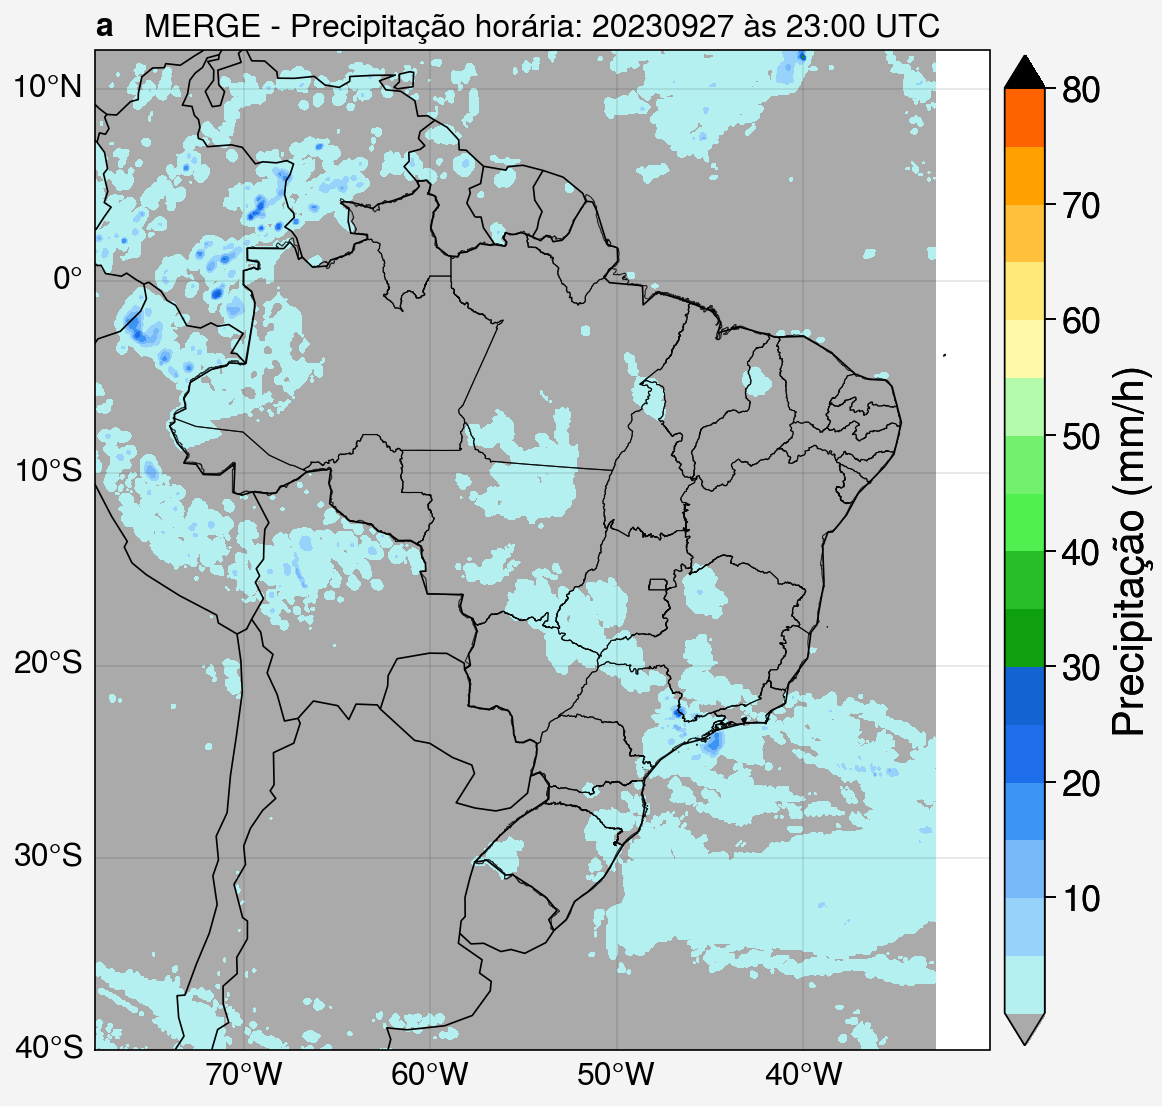

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          title=f'MERGE - Precipitação horária: {ano}{mes}{dia} às {hor}:00 UTC',
          small='16px', large='16px')

# plota a figura
map1 = ax.contourf(lons, lats, precip, cmap=cmap, levels=plot.arange(0.01, 80, 5), extend='both')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Precipitação (mm/h)', ticks=10, ticklabelsize=13, labelsize=15, space=-1.5, length=0.99)

# salva figura
fig.save(f'{dir}output/Fig_1_MERGE_horaria_{ano}{mes}{dia}_{hor}00.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
plot.show()

# **PARTE 2)**: Precipitação por `DIA`

## - **Definindo o período dos dados**

In [ ]:
# ano, mes e dia INICIAL do período
anoi = 2023
mesi = 9
diai = 20

# ano, mes e dia FINAL do período
anof = 2023
mesf = 9
diaf = 27

# FTP dos dados por dia
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/'

## - **Baixando os dados**

In [ ]:
%%time

# Data desejada
date_in = datetime(anoi, mesi, diai)
date_ini = date_in.strftime('%Y%m%d')

date_en = datetime(anof, mesf, diaf)
date_end = date_en.strftime('%Y%m%d')

# Número de dias
n_days = date_en - date_in

# Download dos dados
for file in pd.date_range(date_ini, date_end, freq='d'):

    # extrai ano e mes
    ano = file.strftime('%Y')
    mes = file.strftime('%m')
    dia = file.strftime('%d')

    # nome do arquivo
    filename = f'MERGE_CPTEC_{ano}{mes}{dia}.grib2'

    # ftp + filename. Exemplo: http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230920.grib2
    ftp_filename = f'{ftp}{ano}/{mes.zfill(2)}/{filename}'

    # baixando arquivo diário de chuva
    !wget {ftp_filename}

    print('\n---------------------')
    print('Downloading FTP File:')
    print('---------------------')
    print('Model: MERGE')
    print('File Name: ' + ftp_filename)

--2023-10-03 16:53:54--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230920.grib2
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 393322 (384K)
Saving to: ‘MERGE_CPTEC_20230920.grib2.3’

MERGE_CPTEC_2023092 100%[===================>] 384.10K   436KB/s    in 0.9s    

2023-10-03 16:53:56 (436 KB/s) - ‘MERGE_CPTEC_20230920.grib2.3’ saved [393322/393322]


---------------------
---------------------
Model: MERGE
File Name: http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230920.grib2
--2023-10-03 16:53:56--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/DAILY/2023/09/MERGE_CPTEC_20230921.grib2
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting r

## - **Calcula a chuva mínima, máxima, média e acumulada**

In [ ]:
# Loop nos arquivos diários
for dia in pd.date_range(date_ini, date_end, freq='d'):

    # Extrai no formato '2021-10-17 00:00:00' para '20211017'
    dia = dia.strftime('%Y%m%d')

    # Monta o nome do arquivo 'MERGE_CPTEC_20211001.grib2'
    file_name = f'MERGE_CPTEC_{str(dia)}.grib2'

    # Monta o caminho e nome do arquivo '/content/input/MERGE_CPTEC_20211017.grib2'
    grib = f'/content/{file_name}'

    # Se o arquivo existe
    if (os.path.exists(grib)):

        # imprimindo na tela o arquivo atual
        print('Processando arquivo:', grib)

        # Lendo o arquivo
        grib = pygrib.open(grib)

        # Lendo o campo do modelo
        grb = grib.select(name='Precipitation')[0]

        # Extrai os dados para uma área específica
        precip, lats, lons = grb.data(lat1=extent[1],lat2=extent[3],lon1=extent[0]+360,lon2=extent[2]+360)

        # Converter de 'kg m**-2 s**-1' para 'mm/h'
        #precip = precip * 60 * 60

        # Suaviza os contornos
        precip = scipy.ndimage.zoom(precip, 3)
        lons = scipy.ndimage.zoom(lons, 3)
        lats = scipy.ndimage.zoom(lats, 3)

        # Se é o primeiro ciclo, cria um array que guardará os valores médios
        if (dia == date_ini):
            precip_sum = np.zeros((precip.shape[0], precip.shape[1]))
            precip_max = np.full((precip.shape[0], precip.shape[1]), -9999)
            precip_min = np.full((precip.shape[0], precip.shape[1]),  9999)

        # Soma os valores
        precip_sum = precip_sum + precip

        # Extrai o valor máximo
        precip_max = np.maximum(precip, precip_max)

        # Extrai o valor mínimo
        precip_min = np.minimum(precip, precip_min)

# Calcula o valor médio
precip_med = precip_sum / n_days.days

Processando arquivo: /content/MERGE_CPTEC_20230920.grib2
Processando arquivo: /content/MERGE_CPTEC_20230921.grib2
Processando arquivo: /content/MERGE_CPTEC_20230922.grib2
Processando arquivo: /content/MERGE_CPTEC_20230923.grib2
Processando arquivo: /content/MERGE_CPTEC_20230924.grib2
Processando arquivo: /content/MERGE_CPTEC_20230925.grib2
Processando arquivo: /content/MERGE_CPTEC_20230926.grib2
Processando arquivo: /content/MERGE_CPTEC_20230927.grib2


In [ ]:
# colocar chuva abaixo de 1 mm/h como "Not a Number"
precip_min[precip_min < 1] = np.nan
precip_max[precip_max < 1] = np.nan
precip_med[precip_med < 1] = np.nan
precip_sum[precip_sum < 1] = np.nan

## - **Plota imagem**: Precipitação Máxima, Média e Acumulada  

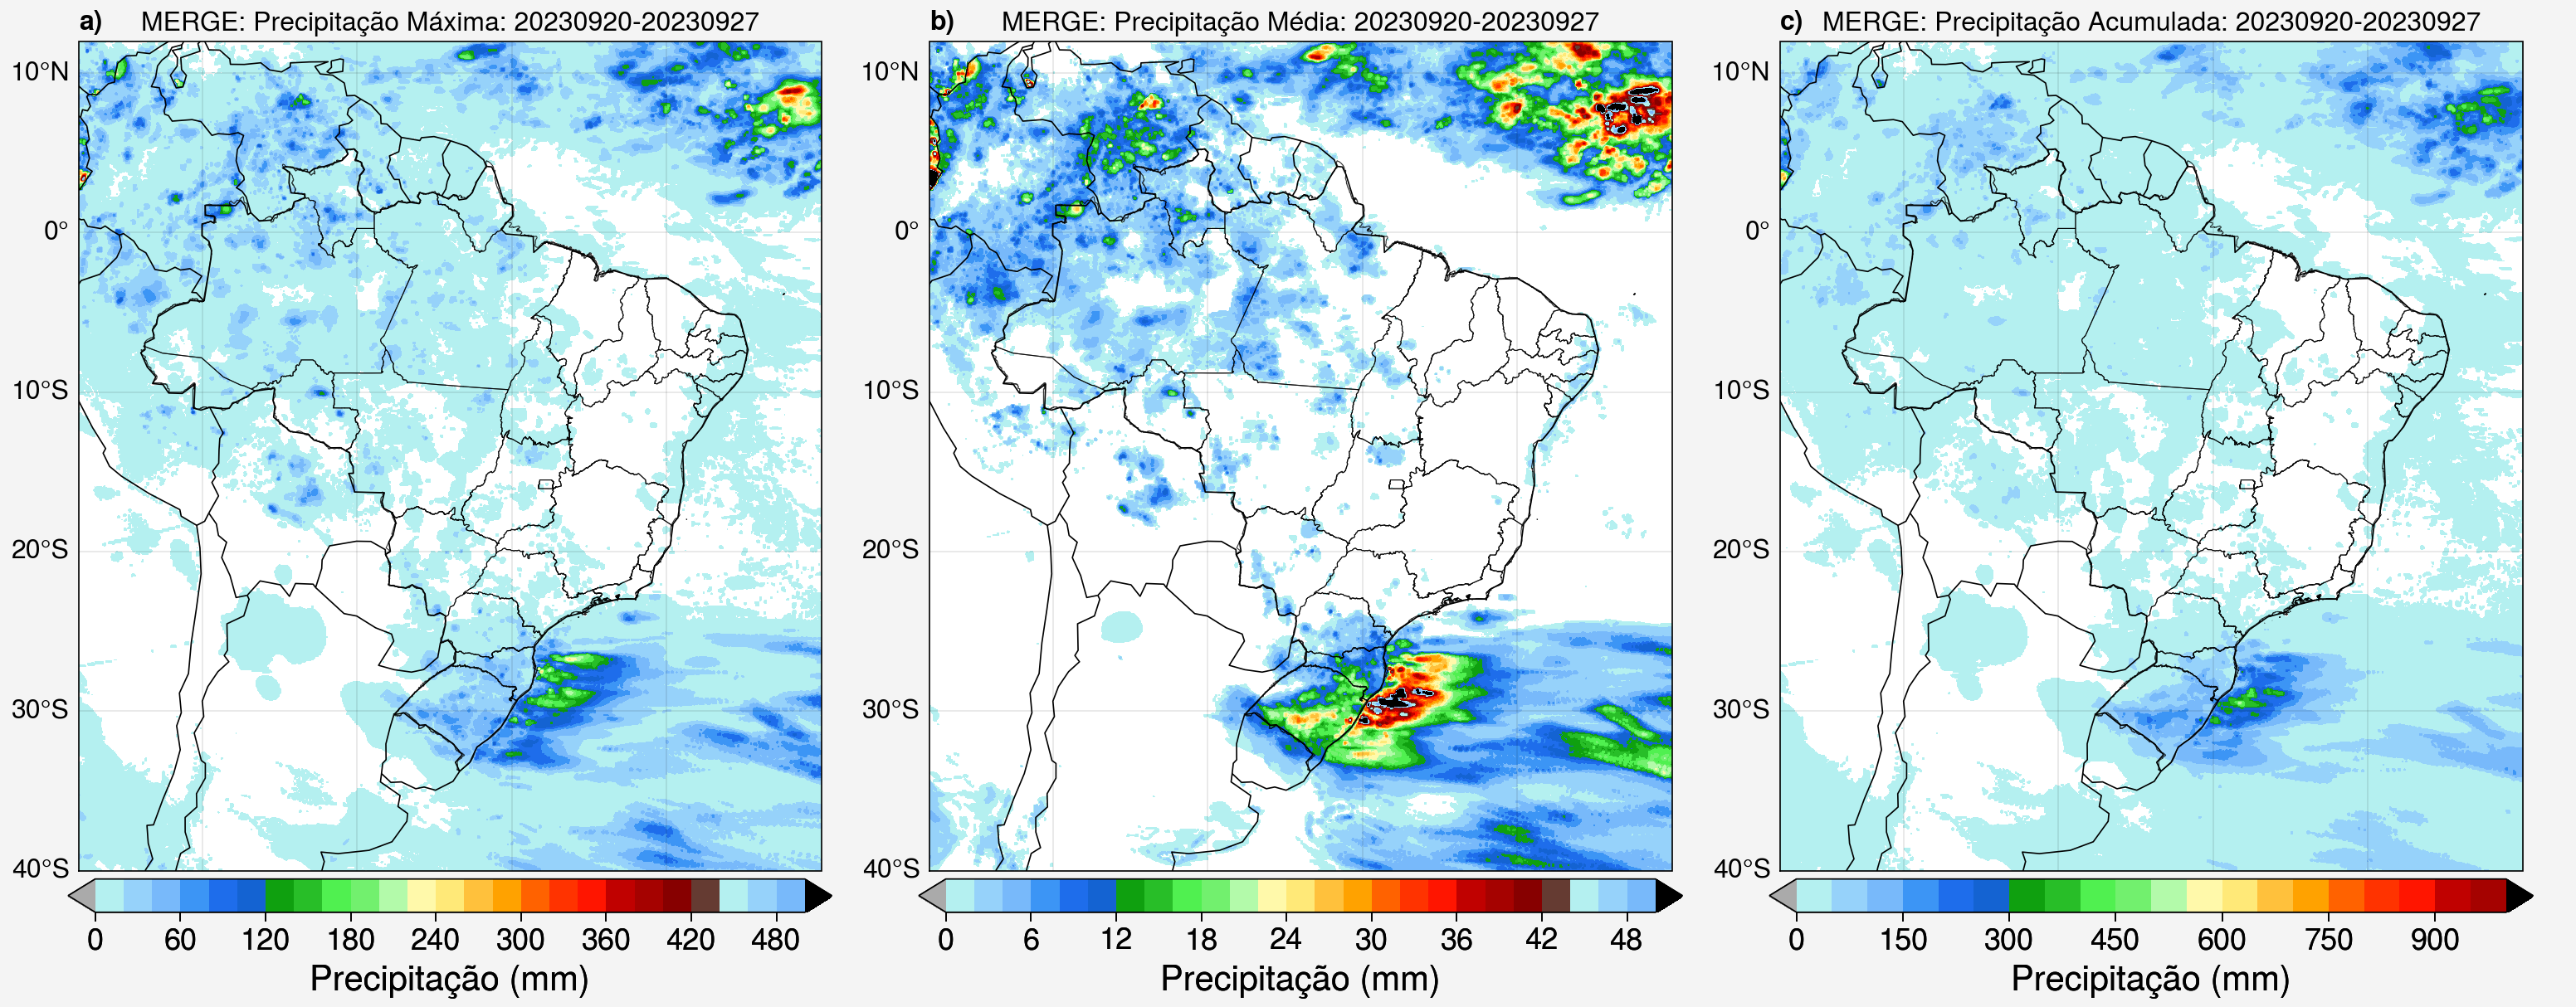

In [ ]:
# Plotando a figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree', ncols=3, sharey=True, sharex=True)

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax),
          lonlim=(lonmin,lonmax),
          abc=True, abcstyle='a)', abcsize=5,
          small='16px', large='16px')

#-------------------------------#
#        Plot 1: Máxima
#-------------------------------#
# plota mapa
map1 = ax[0].contourf(lons, lats, precip_max, cmap=cmap, levels=plot.arange(0, 500, 20), extend='both')

# plota título de figura
ax[0].format(title=f'MERGE: Precipitação Máxima: {date_ini}-{date_end}')

# plota barra de cores
ax[0].colorbar(map1, loc='b', label='Precipitação (mm)', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[0])

#-------------------------------#
#       Plot 2: Média
#-------------------------------#
# plota mapa
map2 = ax[1].contourf(lons, lats, precip_med, cmap=cmap, levels=plot.arange(0, 50, 2), extend='both')

# plota título de figura
ax[1].format(title=f'MERGE: Precipitação Média: {date_ini}-{date_end}')

# plota barra de cores
ax[1].colorbar(map2, loc='b', label='Precipitação (mm)', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[1])

#-------------------------------#
#      Plot 3: Acumulada
#-------------------------------#
# plota mapa
map3 = ax[2].contourf(lons, lats, precip_sum, cmap=cmap, levels=plot.arange(0, 1000, 50), extend='both')

# plota título de figura
ax[2].format(title=f'MERGE: Precipitação Acumulada: {date_ini}-{date_end}')

# plota barra de cores
ax[2].colorbar(map3, loc='b', label='Precipitação (mm)', ticklabelsize=13, labelsize=15, space=0.4, length=0.92, orientation='horizontal')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax[2])
#-------------------------------#

# salva figura
fig.save(f'{dir}output/Fig_2a_MERGE_diaria_max_med_acu_{date_ini}_{date_end}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
plot.show()

## - **Plota imagem**: Precipitação Acumulada  

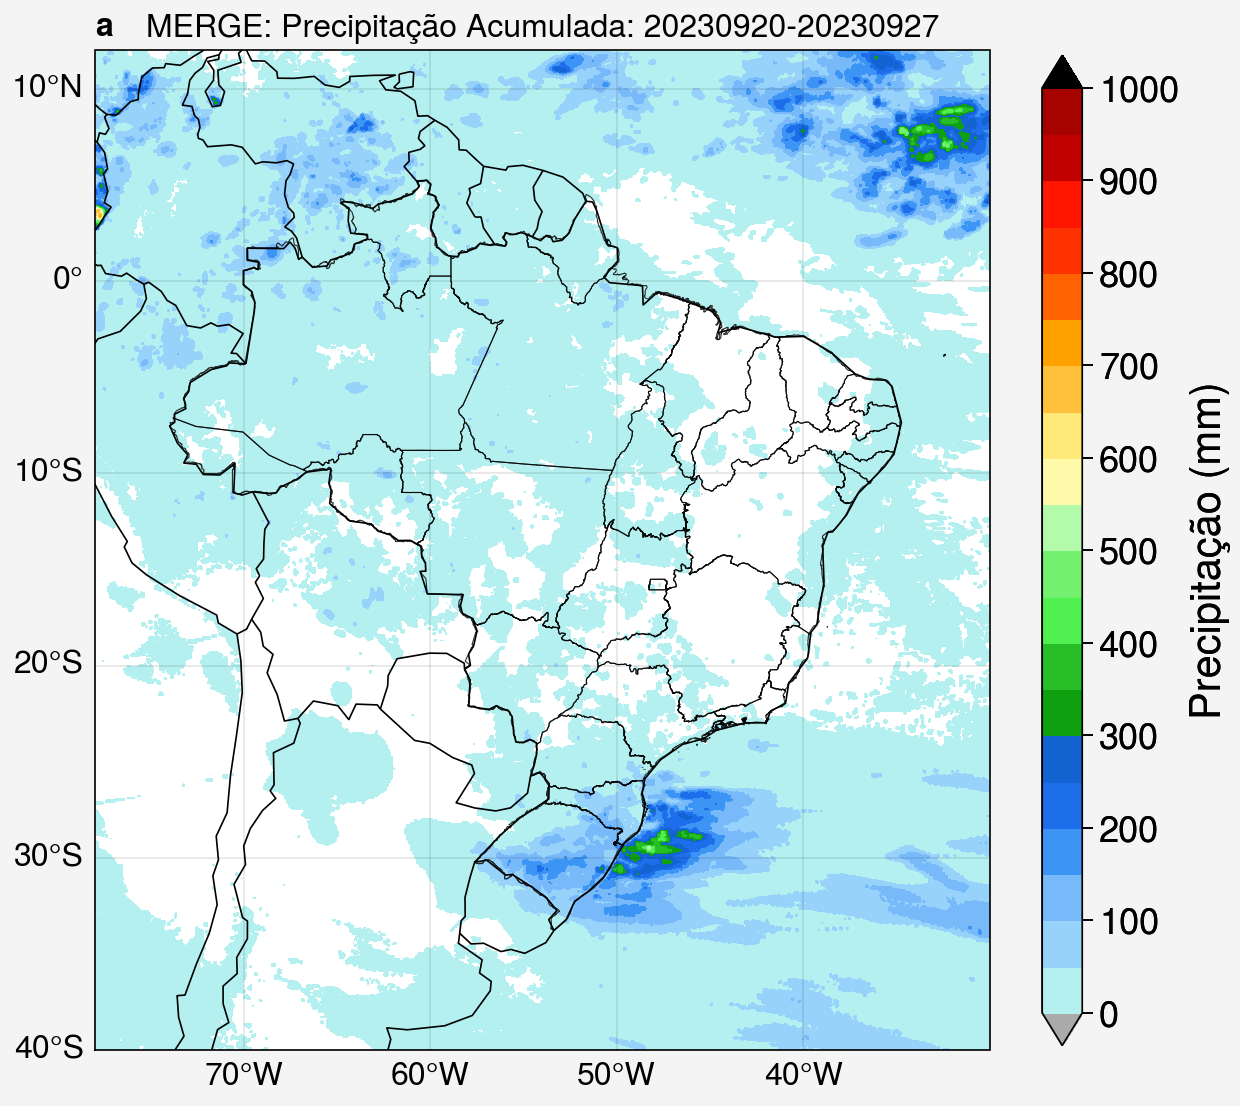

In [ ]:
# Plotando a figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax),
          lonlim=(lonmin,lonmax),
          small='16px', large='16px')

# plota mapa
map1 = ax.contourf(lons,
                   lats,
                   precip_sum,
                   cmap=cmap,
                   levels=plot.arange(0, 1000, 50),
                   extend='both')

# plota título de figura
ax.format(title=f'MERGE: Precipitação Acumulada: {date_ini}-{date_end}')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Precipitação (mm)', ticks=100, ticklabelsize=13, labelsize=15, space=0.0, length=0.99)

# salva figura
fig.save(f'{dir}output/Fig_2b_MERGE_diaria_acu_{date_ini}_{date_end}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
plot.show()

# **PARTE 3)**: Precipitação por `MÊS`

- **Definindo o caminho do FTP onde estão os dados por mês**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

- **Definindo ano, mês e monta o nome do arquivo**

In [ ]:
ano, mes = '2022', 'jan'

In [ ]:
file = f'{ftp}MERGE_CPTEC_acum_{mes}_{ano}.nc'
file

'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/MERGE_CPTEC_acum_jan_2022.nc'

- **Baixando o dado**: os arquivos possuem o nome que indica o mês e ano, como exemplo **MERGE_CPTEC_acum_apr_2001.nc**

In [ ]:
!wget {file}

--2023-10-03 16:58:07--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/MERGE_CPTEC_acum_jan_2022.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522487 (510K) [application/x-netcdf]
Saving to: ‘MERGE_CPTEC_acum_jan_2022.nc.5’

MERGE_CPTEC_acum_ja 100%[===================>] 510.24K   575KB/s    in 0.9s    

2023-10-03 16:58:09 (575 KB/s) - ‘MERGE_CPTEC_acum_jan_2022.nc.5’ saved [522487/522487]



- **Lendo o dado**

In [ ]:
ds = xr.open_dataset(f'/content/MERGE_CPTEC_acum_{mes}_{ano}.nc')

- **Visualizando o dado**

In [ ]:
# mostrando os dados
ds

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 1)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2022-01-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 ...

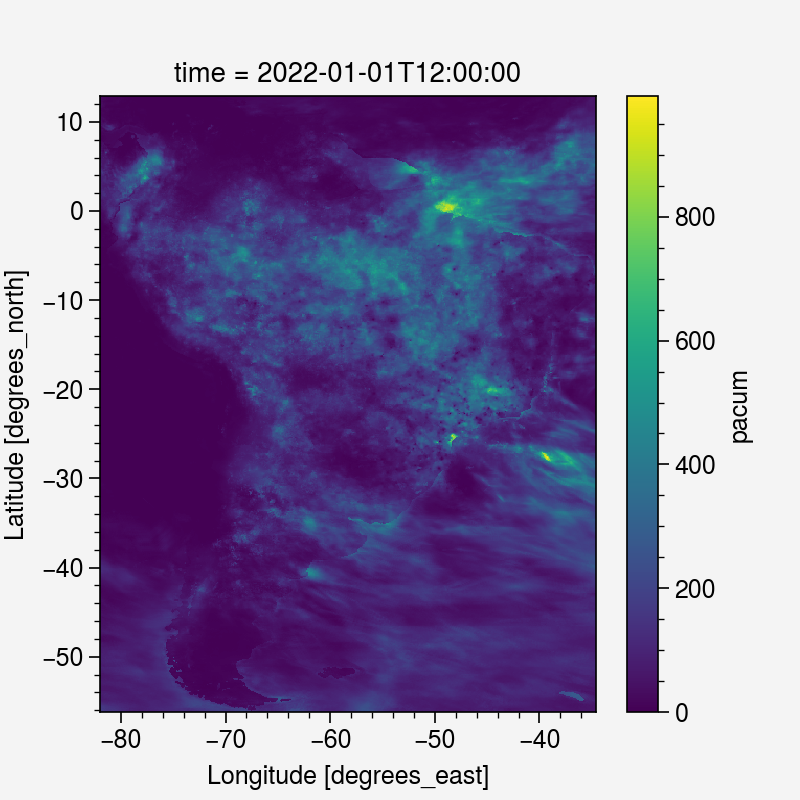

In [ ]:
# plotando uma figura simples
ds['pacum'].plot()

- **Plota a figura**

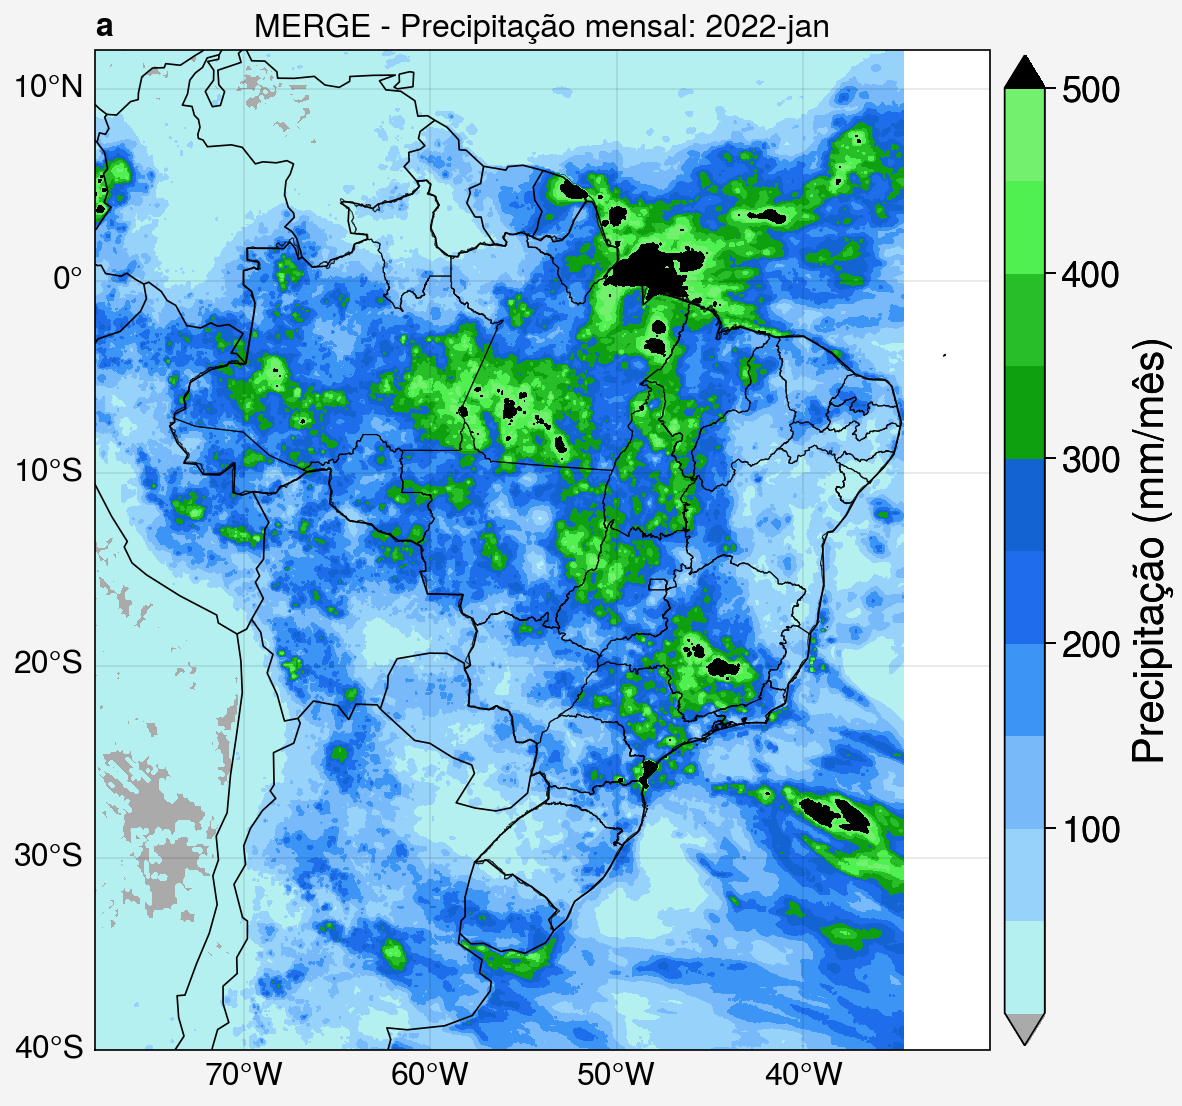

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(axwidth=5, axheight=5, tight=True, proj='pcarree')

# define formato da figura
ax.format(coast=True, borders=True, innerborders=False,
          labels=True,
          latlines=10, lonlines=10,
          latlim=(latmin,latmax), lonlim=(lonmin,lonmax),
          title=f'MERGE - Precipitação mensal: {ano}-{mes}',
          small='16px', large='16px')

# plota a figura
map1 = ax.contourf(ds['lon'], ds['lat'], ds['pacum'][0,:,:], cmap=cmap, levels=plot.arange(0.01, 500, 50), extend='both')

# plota contornos dos Estados
estados.plot(edgecolor='black', facecolor='none', linewidth=0.4, alpha=0.8, ax=ax)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', label='Precipitação (mm/mês)', ticks=100, ticklabelsize=13, labelsize=15, space=-1.5, length=0.99)

# salva figura
fig.save(f'{dir}output/Fig_3_MERGE_mensal_{ano}{mes}.png', bbox_inches='tight', pad_inches=0, dpi=300)

# exibe a figura na tela
plot.show()

# **PARTE 4)**: `Climatologia`

##**- Definindo o caminho do FTP onde estão os dados climatológicos**

In [ ]:
ftp = 'http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/'

##**- Baixa os dados mensais**

In [ ]:
# define o nome dos meses
meses = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

In [ ]:
# define o ano inicial e final
ano_inicial = 2016
ano_final = 2021

In [ ]:
%%time
# loop dos anos e meses
for ano in range(ano_inicial, ano_final+1): # loop dos anos
    for mes in meses: # loop dos meses

        print('-------------------------------------------------------------------------------------')
        print(f'BAIXANDO ARQUIVO: {ano}-{mes}')
        print('---------------------------------------------------------------------------------- \n')

        # monta nome do arquivo
        file = f'{ftp}MERGE_CPTEC_acum_{mes}_{ano}.nc'

        # baixa arquivo
        !wget {file}

-------------------------------------------------------------------------------------
BAIXANDO ARQUIVO: 2016-jan
---------------------------------------------------------------------------------- 

--2023-10-03 17:00:13--  http://ftp.cptec.inpe.br/modelos/tempo/MERGE/GPM/CLIMATOLOGY/MONTHLY_ACCUMULATED_YEARLY/MERGE_CPTEC_acum_jan_2016.nc
Resolving ftp.cptec.inpe.br (ftp.cptec.inpe.br)... 150.163.192.38
Connecting to ftp.cptec.inpe.br (ftp.cptec.inpe.br)|150.163.192.38|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 524343 (512K) [application/x-netcdf]
Saving to: ‘MERGE_CPTEC_acum_jan_2016.nc.3’

MERGE_CPTEC_acum_ja 100%[===================>] 512.05K   485KB/s    in 1.1s    

2023-10-03 17:00:15 (485 KB/s) - ‘MERGE_CPTEC_acum_jan_2016.nc.3’ saved [524343/524343]

-------------------------------------------------------------------------------------
BAIXANDO ARQUIVO: 2016-feb
---------------------------------------------------------------------------------- 

--20

##**- Leitura dos dados**. Iremos ler os arquivos do ano todo de uma única vez, e produziremos um único conjunto de dados. Para isto usaremos mais uma vez a biblioteca [**xarray**](https://docs.xarray.dev/en/stable/) com a função [**open_mfdataset**](https://docs.xarray.dev/en/stable/generated/xarray.open_mfdataset.html).

In [ ]:
# mostrando um dos arquivos
ds = xr.open_dataset('/content/MERGE_CPTEC_acum_may_2016.nc')
ds

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 1)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2016-05-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 ...

In [ ]:
# lista dos arquivos que foram baixados
files=[]
for i in range(ano_inicial, ano_final+1):
    files = files + glob.glob(f'/content/MERGE_CPTEC_acum*_{i}.nc')
files

['/content/MERGE_CPTEC_acum_sep_2016.nc',
 '/content/MERGE_CPTEC_acum_dec_2016.nc',
 '/content/MERGE_CPTEC_acum_aug_2016.nc',
 '/content/MERGE_CPTEC_acum_feb_2016.nc',
 '/content/MERGE_CPTEC_acum_apr_2016.nc',
 '/content/MERGE_CPTEC_acum_oct_2016.nc',
 '/content/MERGE_CPTEC_acum_jan_2016.nc',
 '/content/MERGE_CPTEC_acum_jun_2016.nc',
 '/content/MERGE_CPTEC_acum_may_2016.nc',
 '/content/MERGE_CPTEC_acum_mar_2016.nc',
 '/content/MERGE_CPTEC_acum_jul_2016.nc',
 '/content/MERGE_CPTEC_acum_nov_2016.nc',
 '/content/MERGE_CPTEC_acum_oct_2017.nc',
 '/content/MERGE_CPTEC_acum_aug_2017.nc',
 '/content/MERGE_CPTEC_acum_apr_2017.nc',
 '/content/MERGE_CPTEC_acum_jul_2017.nc',
 '/content/MERGE_CPTEC_acum_dec_2017.nc',
 '/content/MERGE_CPTEC_acum_mar_2017.nc',
 '/content/MERGE_CPTEC_acum_nov_2017.nc',
 '/content/MERGE_CPTEC_acum_feb_2017.nc',
 '/content/MERGE_CPTEC_acum_jun_2017.nc',
 '/content/MERGE_CPTEC_acum_sep_2017.nc',
 '/content/MERGE_CPTEC_acum_may_2017.nc',
 '/content/MERGE_CPTEC_acum_jan_20

In [ ]:
# quantidade de arquivos
len(files)

72

In [ ]:
# lendo os dados
chuva_por_mes = xr.open_mfdataset(files, concat_dim='time', combine='nested')

In [ ]:
# mostrando os dados
chuva_por_mes

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 72)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2016-09-01T12:00:00 ... 2021-10-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 dask.array<chunksize=(1, 691, 474), meta=np.ndarray>

In [ ]:
# mostrando os tempos
chuva_por_mes['time']

<xarray.DataArray 'time' (time: 72)>
array(['2016-09-01T12:00:00.000000000', '2016-12-01T12:00:00.000000000',
       '2016-08-01T12:00:00.000000000', '2016-02-01T12:00:00.000000000',
       '2016-04-01T12:00:00.000000000', '2016-10-01T12:00:00.000000000',
       '2016-01-01T12:00:00.000000000', '2016-06-01T12:00:00.000000000',
       '2016-05-01T12:00:00.000000000', '2016-03-01T12:00:00.000000000',
       '2016-07-01T12:00:00.000000000', '2016-11-01T12:00:00.000000000',
       '2017-10-01T12:00:00.000000000', '2017-08-01T12:00:00.000000000',
       '2017-04-01T12:00:00.000000000', '2017-07-01T12:00:00.000000000',
       '2017-12-01T12:00:00.000000000', '2017-03-01T12:00:00.000000000',
       '2017-11-01T12:00:00.000000000', '2017-02-01T12:00:00.000000000',
       '2017-06-01T12:00:00.000000000', '2017-09-01T12:00:00.000000000',
       '2017-05-01T12:00:00.000000000', '2017-01-01T12:00:00.000000000',
       '2018-07-01T12:00:00.000000000', '2018-09-01T12:00:00.000000000',
       '2018-10-01T12:00:00.000000000', '2018-02-01T12:00:00.000000000',
       '2018-04-01T12:00:00.000000000', '2018-11-01T12:00:00.000000000',
       '2018-08-01T12:00:00.000000000', '2018-03-01T12:00:00.000000000',
       '2018-06-01T12:00:00.000000000', '2018-12-01T12:00:00.000000000',
       '2018-05-01T12:00:00.000000000', '2018-01-01T12:00:00.000000000',
       '2019-10-01T12:00:00.000000000', '2019-09-01T12:00:00.000000000',
       '2019-04-01T12:00:00.000000000', '2019-07-01T12:00:00.000000000',
       '2019-06-01T12:00:00.000000000', '2019-08-01T12:00:00.000000000',
       '2019-01-01T12:00:00.000000000', '2019-05-01T12:00:00.000000000',
       '2019-02-01T12:00:00.000000000', '2019-03-01T12:00:00.000000000',
       '2019-12-01T12:00:00.000000000', '2019-11-01T12:00:00.000000000',
       '2020-10-01T12:00:00.000000000', '2020-08-01T12:00:00.000000000',
       '2020-06-01T12:00:00.000000000', '2020-01-01T12:00:00.000000000',
       '2020-11-01T12:00:00.000000000', '2020-09-01T12:00:00.000000000',
       '2020-02-01T12:00:00.000000000', '2020-04-01T12:00:00.000000000',
       '2020-07-01T12:00:00.000000000', '2020-05-01T12:00:00.000000000',
       '2020-03-01T12:00:00.000000000', '2020-12-01T12:00:00.000000000',
       '2021-06-01T12:00:00.000000000', '2021-09-01T12:00:00.000000000',
       '2021-08-01T12:00:00.000000000', '2021-03-01T12:00:00.000000000',
       '2021-05-01T12:00:00.000000000', '2021-01-01T12:00:00.000000000',
       '2021-12-01T12:00:00.000000000', '2021-11-01T12:00:00.000000000',
       '2021-02-01T12:00:00.000000000', '2021-04-01T12:00:00.000000000',
       '2021-07-01T12:00:00.000000000', '2021-10-01T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2016-09-01T12:00:00 ... 2021-10-01T12:00:00
Attributes:
    long_name:  Time

##**- Alguns gráficos básicos**

In [ ]:
chuva_por_mes

<xarray.Dataset>
Dimensions:  (lon: 474, lat: 691, time: 72)
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * time     (time) datetime64[ns] 2016-09-01T12:00:00 ... 2021-10-01T12:00:00
Data variables:
    pacum    (time, lat, lon) float64 dask.array<chunksize=(1, 691, 474), meta=np.ndarray>

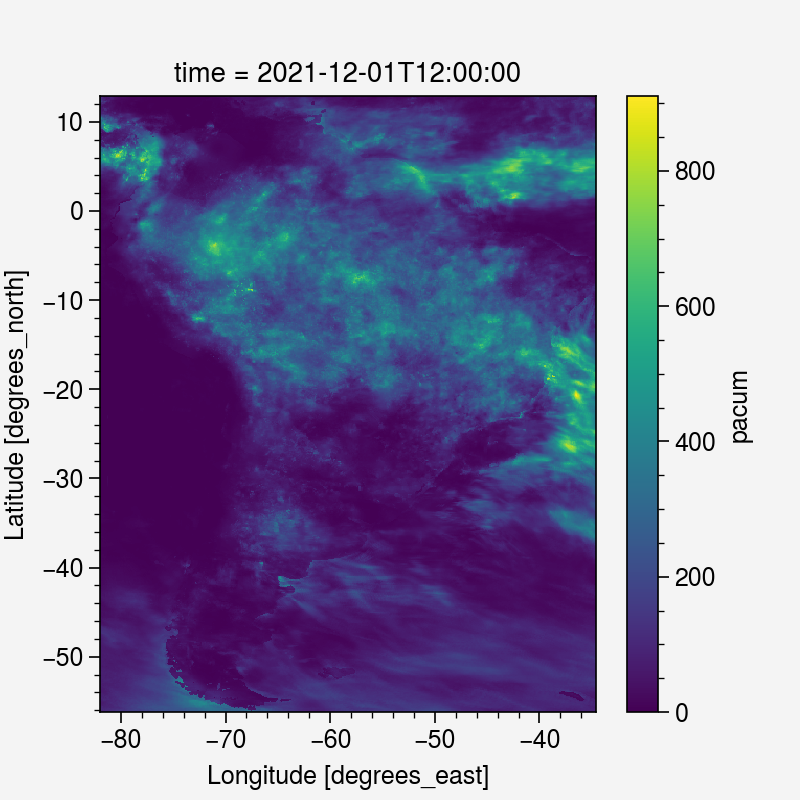

In [ ]:
# selecionando o mês pelo NOME
chuva_por_mes['pacum'].loc['2021-12-01T12:00:00.000000000'].plot()

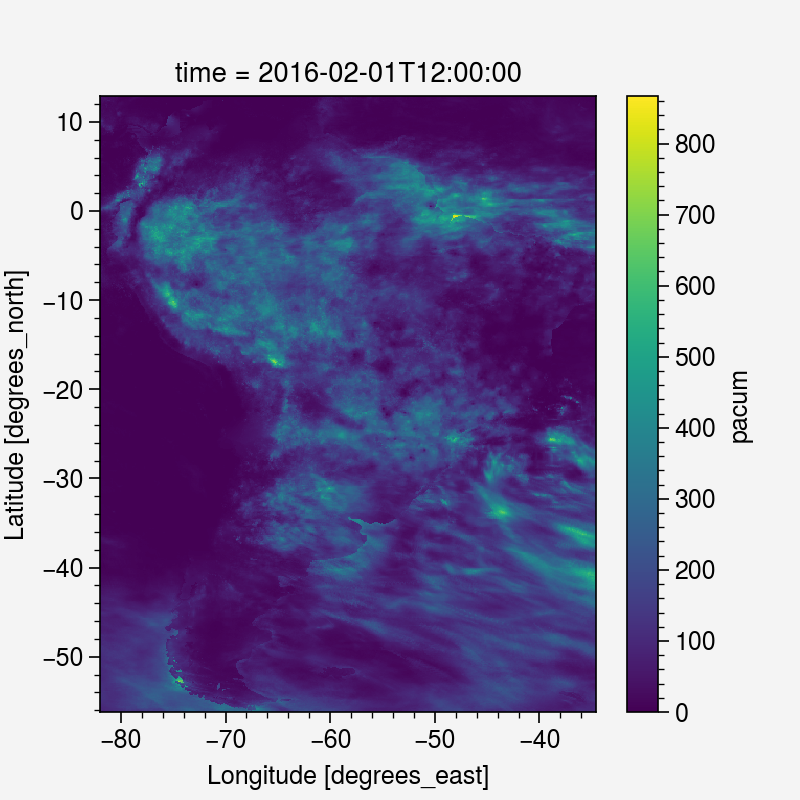

In [ ]:
# selecionando o mês pelo ÍNDICE
chuva_por_mes['pacum'].isel(time=3).plot()

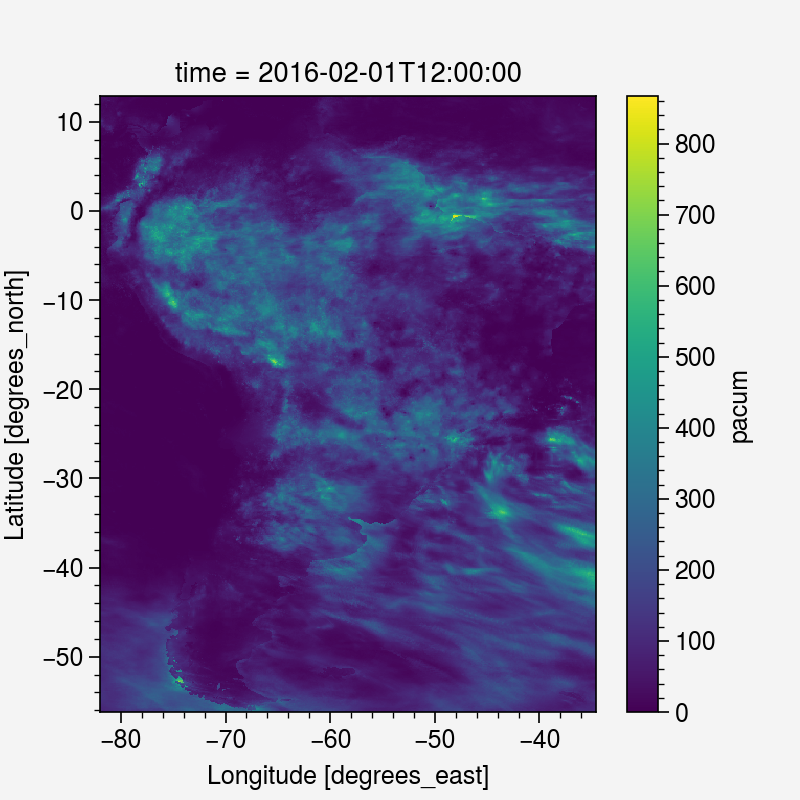

In [ ]:
# selecionando o mês pelo ÍNDICE da matriz
chuva_por_mes['pacum'][3, :, :].plot()

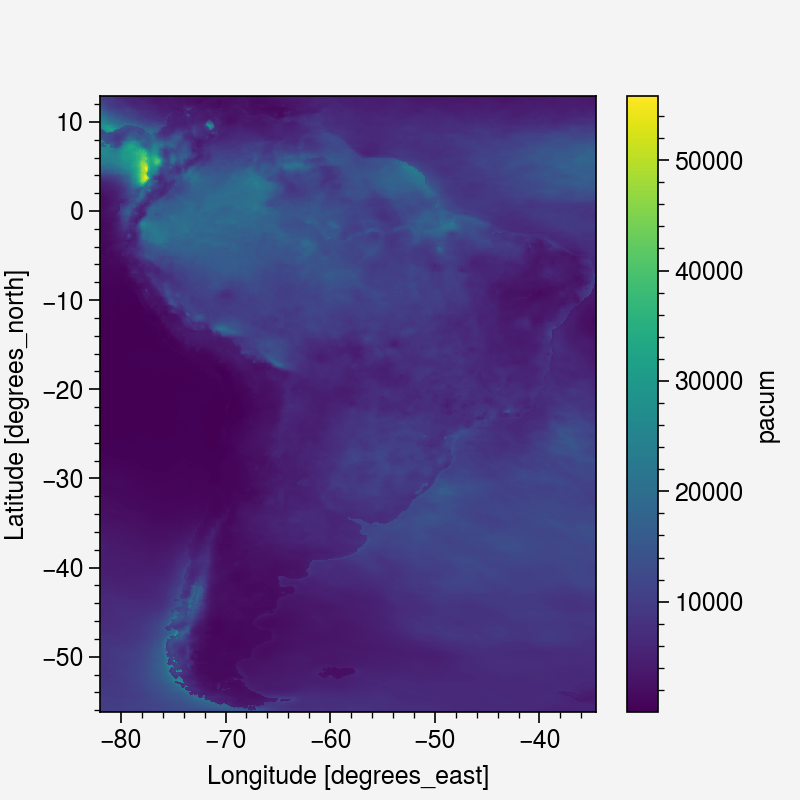

In [ ]:
# fazendo uma soma no tempo
chuva_por_mes['pacum'].sum(dim='time').plot()

##**- Alguns gráficos mais sofiscados e detalhados**

###**Baixando e lendo o shapefile de um determinado Estado do Brasil**

**Baixando o shapefile**

In [ ]:
# sigla do estado
sigla_estado = 'MG'

# url
url = 'https://github.com/evmpython/shapefile/raw/main/UFs/'

# caminho completo do arquivo. Exemplo: https://github.com/evmpython/shapefile/raw/main/UFs/MG/MG_UF_2019.shp
file1 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.cpg'
file2 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.dbf'
file3 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.prj'
file4 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.shp'
file5 = f'{url}{sigla_estado}/{sigla_estado}_UF_2019.shx'

# baixa o shapefile
!wget -c {file1}
!wget -c {file2}
!wget -c {file3}
!wget -c {file4}
!wget -c {file5}

--2023-10-03 17:20:46--  https://github.com/evmpython/shapefile/raw/main/UFs/MG/MG_UF_2019.cpg
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/evmpython/shapefile/main/UFs/MG/MG_UF_2019.cpg [following]
--2023-10-03 17:20:46--  https://raw.githubusercontent.com/evmpython/shapefile/main/UFs/MG/MG_UF_2019.cpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2023-10-03 17:20:46--  https://github.com/evmpython/shapefile/raw/main/UFs/MG/MG_UF_2019.dbf
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (

**Leitura do shapefile**

In [ ]:
# leitura do shapefile com a biblioteca SALEM
shp = salem.read_shapefile(f'/content/{sigla_estado}_UF_2019.shp')

In [ ]:
# mostra o shapefile que foi lido
shp

CD_UF         NM_UF SIGLA_UF NM_REGIAO  \
0    31  Minas Gerais       MG   Sudeste   

                                            geometry      min_x      max_x  \
0  POLYGON ((-50.74208 -19.21384, -50.74241 -19.2... -51.046082 -39.856829   

       min_y      max_y  
0 -22.922755 -14.233181

In [ ]:
# seleciona os limites da imagem
lonmin = float(shp['min_x'])
lonmax = float(shp['max_x'])

latmin = float(shp['min_y'])
latmax = float(shp['max_y'])

print(lonmin, lonmax)
print(latmin, latmax)

-51.046081811 -39.856828891
-22.92275526 -14.233180666


###**a) Por ano**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_por_ano = chuva_por_mes['pacum'].groupby('time.year').sum('time')

In [ ]:
# recorta o dado para região
chuva_por_ano = chuva_por_ano.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_por_ano

<xarray.DataArray 'pacum' (year: 6, lat: 691, lon: 474)>
dask.array<where, shape=(6, 691, 474), dtype=float64, chunksize=(1, 691, 474), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * year     (year) int64 2016 2017 2018 2019 2020 2021
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

**Plota gráfico**

In [ ]:
len(chuva_por_ano)

6

Processando o ano: .... 2016
Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021


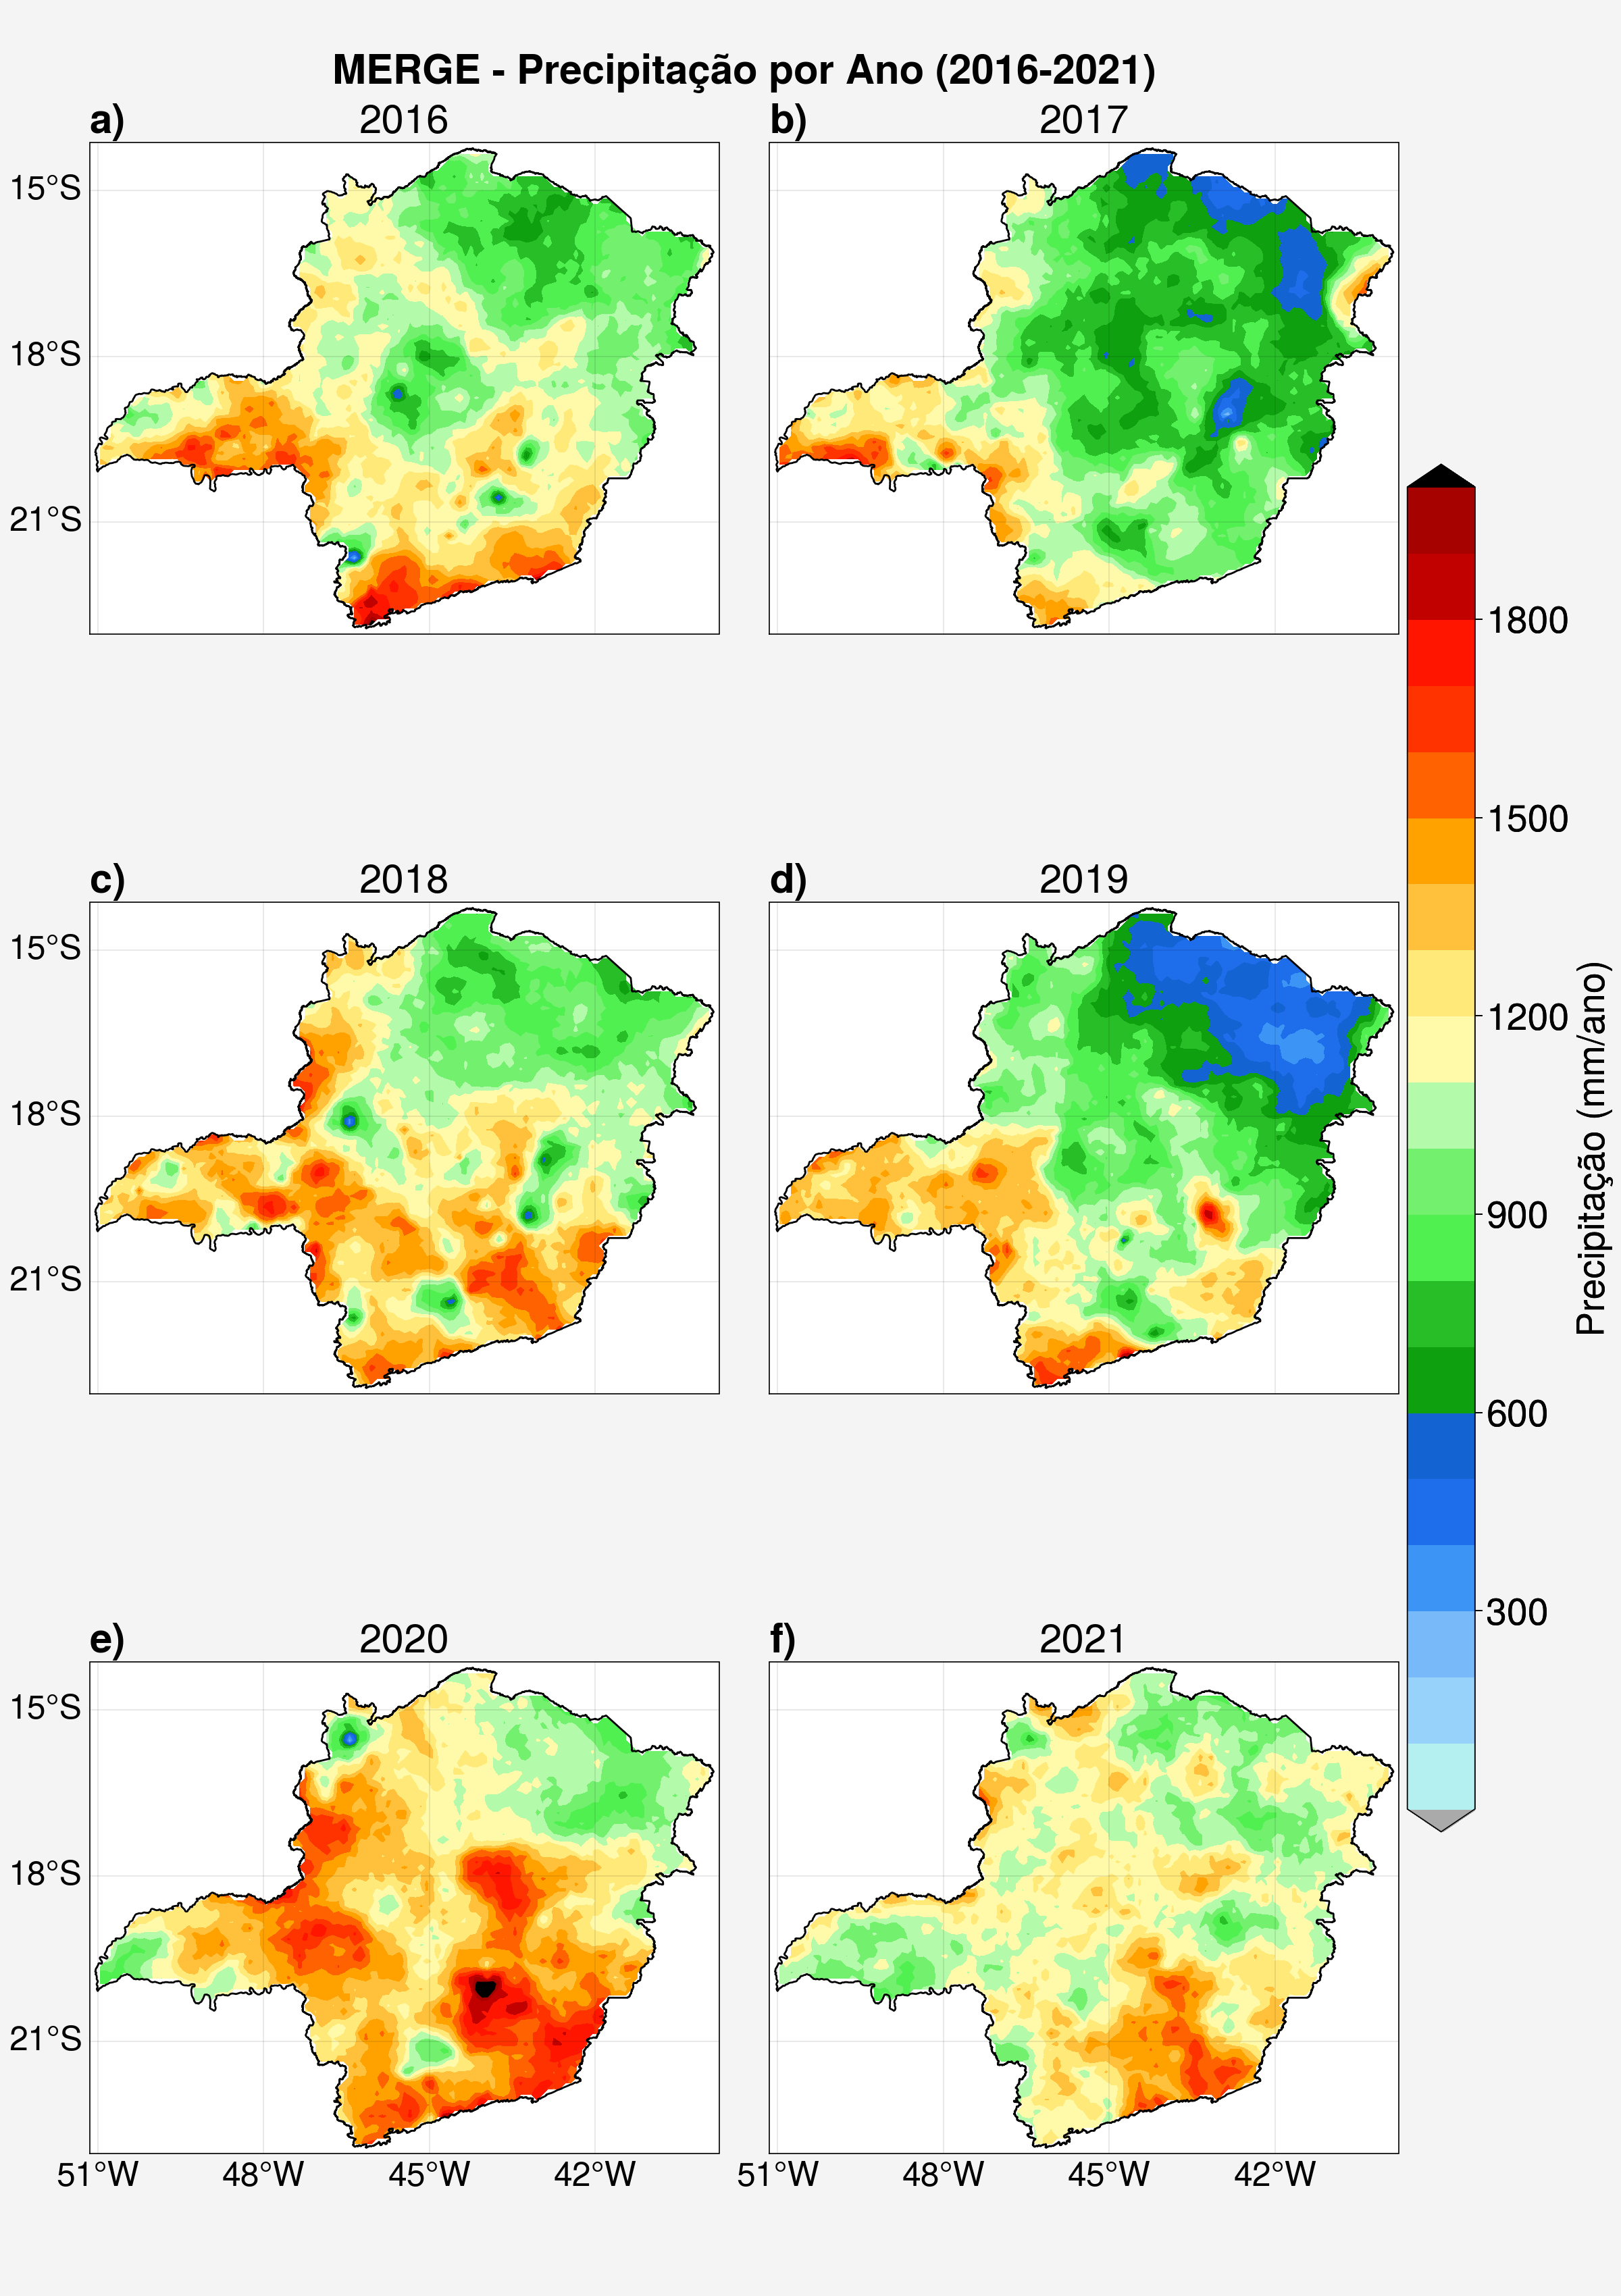

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(12, 17), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação por Ano ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['lon'],
                        chuva_por_ano['lat'],
                        chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=plot.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 2): ax[i].format(title=ano, labels = [True, False, False, False])
  if(i == 1): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 3): ax[i].format(title=ano, labels = [False, False, False, False])
  if(i == 4): ax[i].format(title=ano, labels = [True, False, True, False])
  if(i == 5): ax[i].format(title=ano, labels = [False, False, True, False])

  # plota contorno do Estado de MG
  shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
  ax[i].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5, )

# salva figura
fig.savefig(f'{dir}output/Fig_4a_MERGE_por_ano.png', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

Uma outra forma é **retirar** os labels dos eixos das latitudes e longitudes.

Processando o ano: .... 2016
Processando o ano: .... 2017
Processando o ano: .... 2018
Processando o ano: .... 2019
Processando o ano: .... 2020
Processando o ano: .... 2021


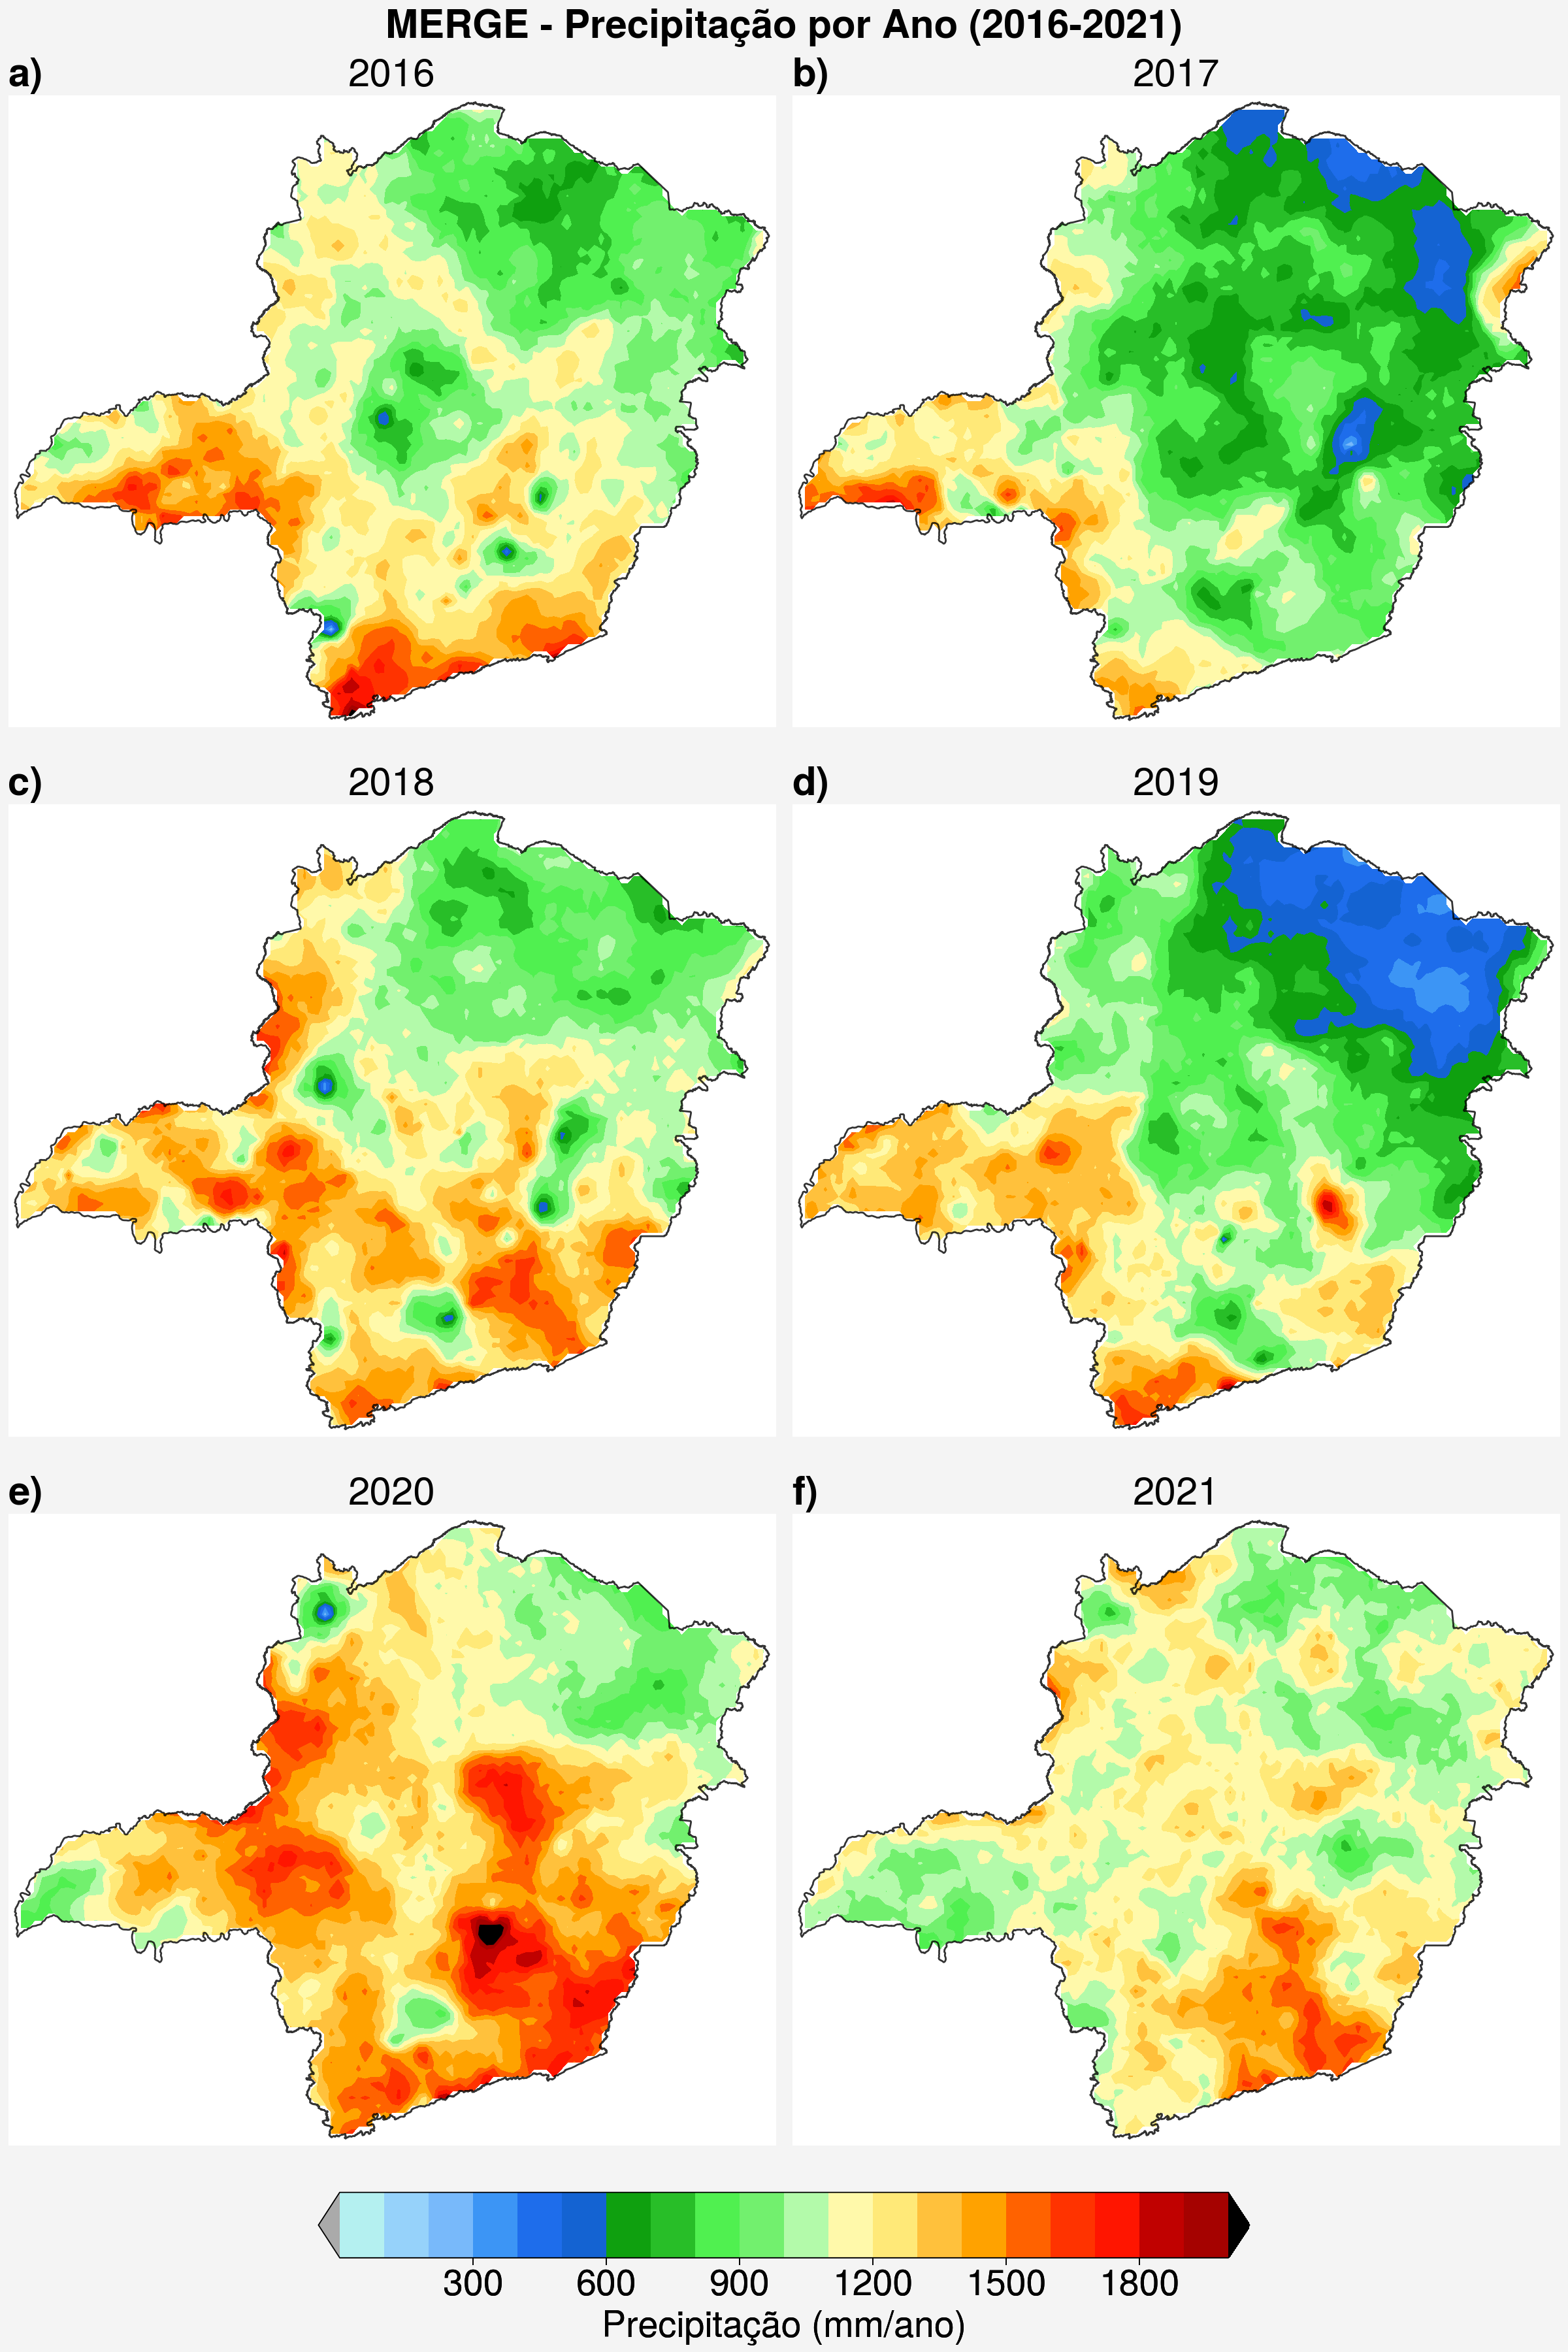

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(12, 18), nrows=3, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação por Ano ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px',
          linewidth=0, grid=False)

# loop dos anos
for i in range(len(chuva_por_ano)):

  # extrai o nome do ano
  ano = str(chuva_por_ano['year'][i].values)[0:4]

  # exibe na tela o ano que esta sendo processado
  print(f'Processando o ano: .... {ano}')

  # plota figura
  map1 = ax[i].contourf(chuva_por_ano['lon'], chuva_por_ano['lat'], chuva_por_ano[i,:,:],
                        cmap=cmap,
                        levels=plot.arange(0.01, 2000, 100),
                        extend='both')

  # plota titulo de cada figura
  if(i == 0): ax[i].format(title=ano, labels = False)
  if(i == 2): ax[i].format(title=ano, labels = False)
  if(i == 1): ax[i].format(title=ano, labels = False)
  if(i == 3): ax[i].format(title=ano, labels = False)
  if(i == 4): ax[i].format(title=ano, labels = False)
  if(i == 5): ax[i].format(title=ano, labels = False)

  # plota contorno do Estado de MG
  shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax[i])

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_4b_MERGE_por_ano.png', transparent=True, dpi=300, bbox_inches="tight", pad_inches=0.1)

###**b) Anual**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_anual = chuva_por_ano.mean(dim='year')

In [ ]:
# recorta o dado para região
chuva_media_anual = chuva_media_anual.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_anual

<xarray.DataArray 'pacum' (lat: 691, lon: 474)>
dask.array<where, shape=(691, 474), dtype=float64, chunksize=(691, 474), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

**Plota gráfico**

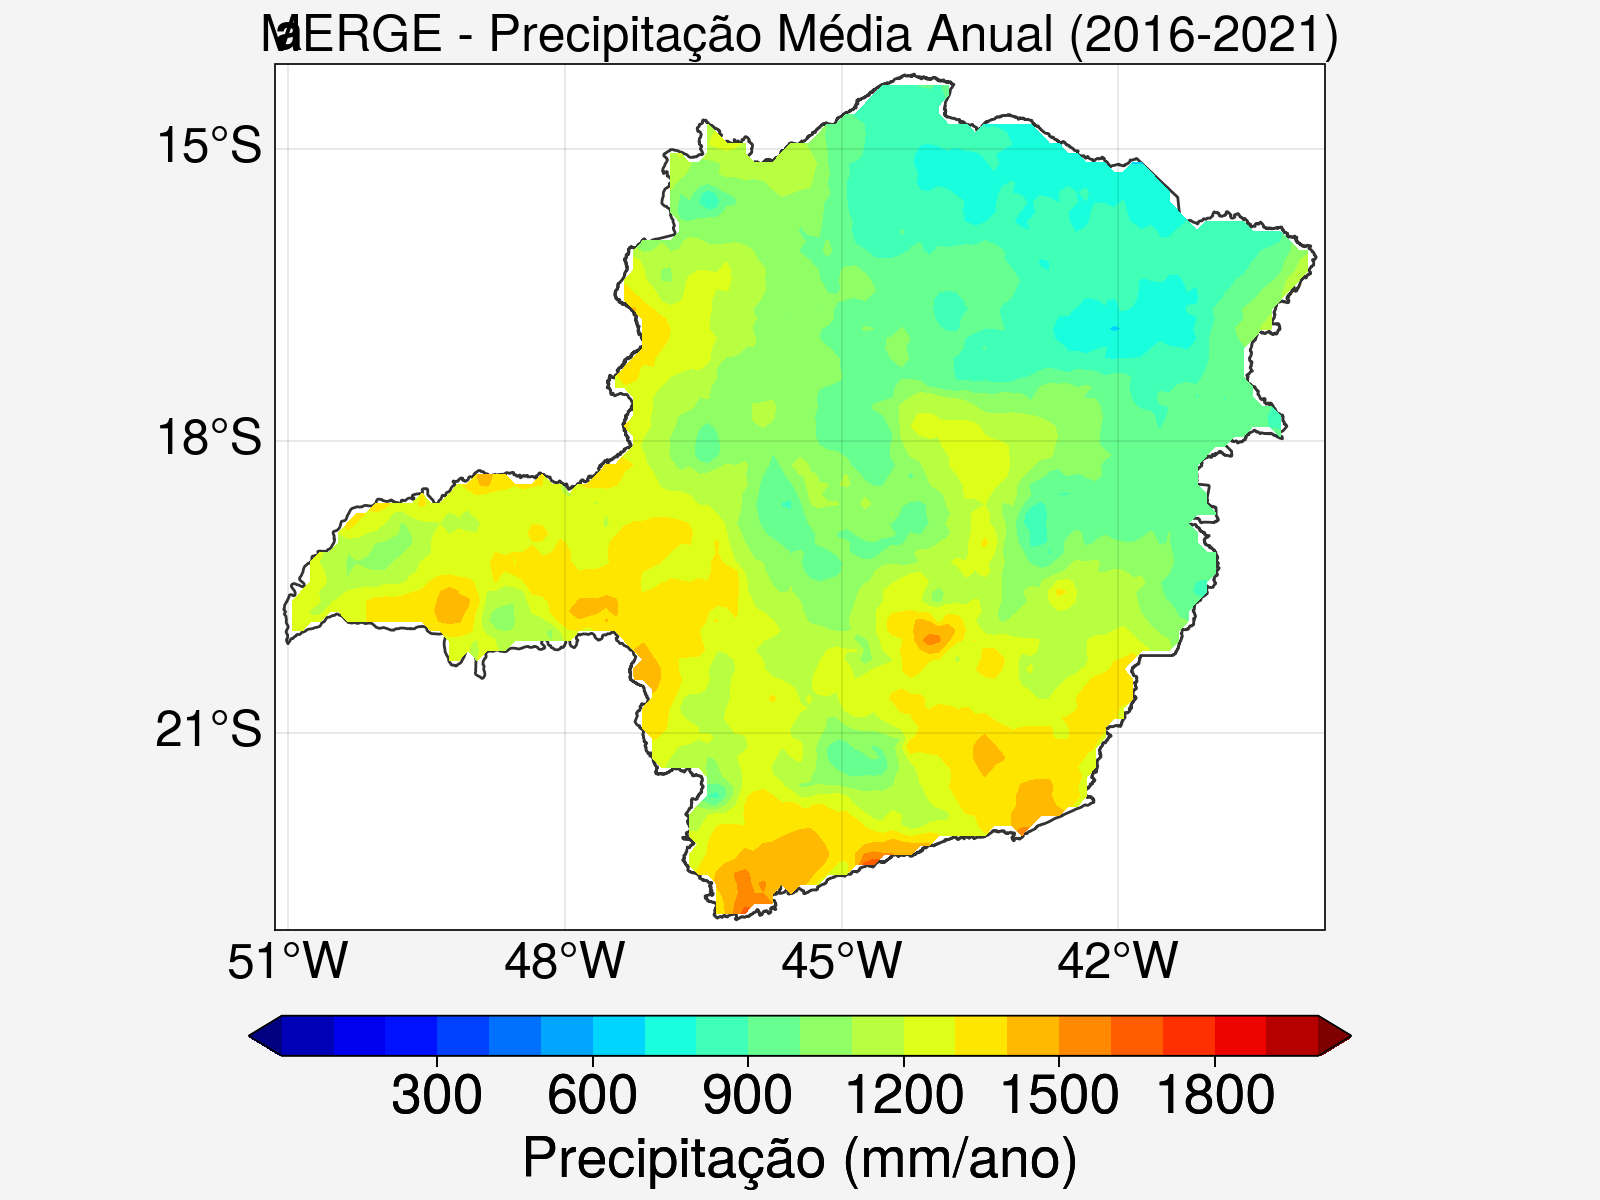

In [ ]:
# Plotando a figura
fig, ax = plot.subplots(figsize=(8,6), tight=True, proj='pcarree')

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          labels=True,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          small='25px', large='25px',
          title = f'MERGE - Precipitação Média Anual ({ano_inicial}-{ano_final})')

# plota contorno do Estado de MG
shp.plot(edgecolor='black', facecolor='none', linewidth=1, alpha=0.8, ax=ax)

# plota figura
map1 = ax.contourf(chuva_media_anual['lon'],
                   chuva_media_anual['lat'],
                   chuva_media_anual[:,:],
                   cmap='jet',
                   levels=plot.arange(0.01, 2000, 100),
                   extend='both')

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/ano)', ticks=300, ticklabelsize=20, labelsize=20, length=0.70)

# salva figura
fig.savefig(f'{dir}output/Fig_5_MERGE_media_anual.png', dpi=300)

###**c) Sazonal**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_sazonal = chuva_por_mes['pacum'].groupby("time.season").mean(dim="time")

In [ ]:
# recorta o dado para região
chuva_media_sazonal  = chuva_media_sazonal.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_sazonal

<xarray.DataArray 'pacum' (season: 4, lat: 691, lon: 474)>
dask.array<where, shape=(4, 691, 474), dtype=float64, chunksize=(1, 691, 474), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

**Plota gráfico**

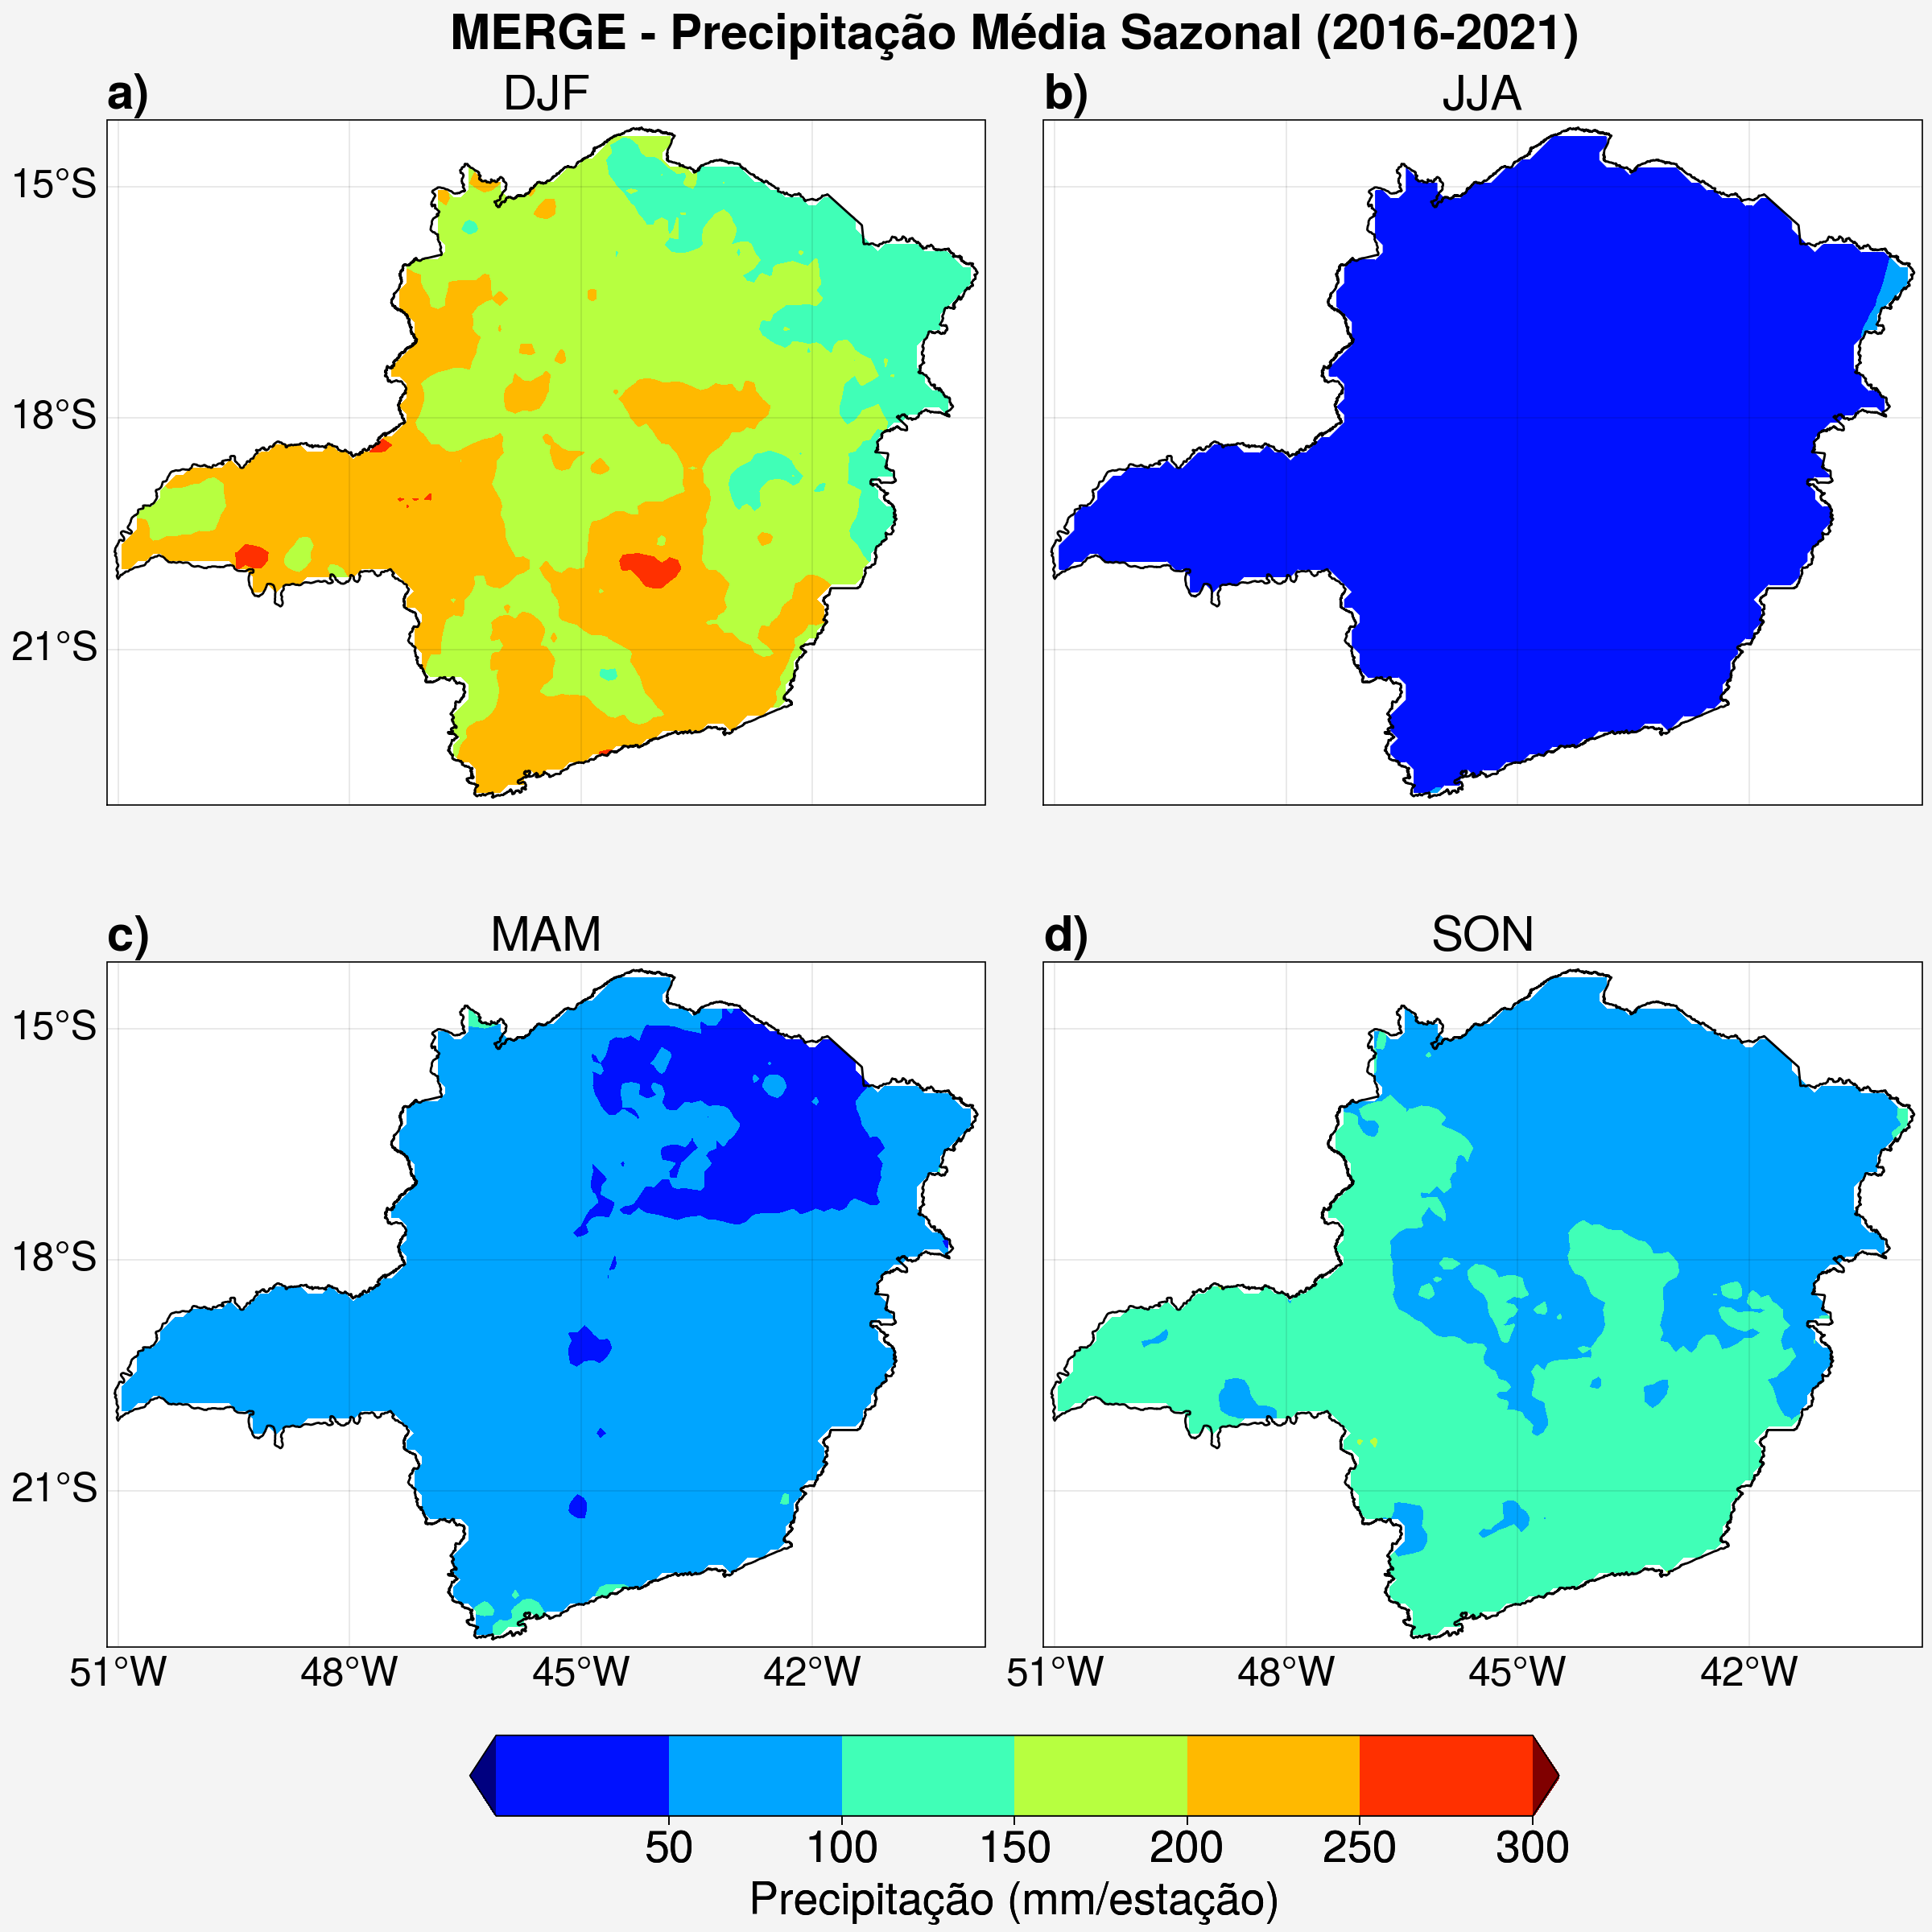

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(figsize=(12,12), nrows=2, ncols=2, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação Média Sazonal ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop das estações
for s in range(len(chuva_media_sazonal)):

    # plota figura
    map1 = ax[s].contourf(chuva_media_sazonal['lon'],
                          chuva_media_sazonal['lat'],
                          chuva_media_sazonal[s,:,:],
                          cmap='jet', levels=plot.arange(0.01, 300, 50),
                          extend='both')

    # plota titulo de cada figura
    if(s == 0): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, False, False])
    if(s == 1): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, False, False])
    if(s == 2): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [True, False, True, False])
    if(s == 3): ax[s].format(title=chuva_media_sazonal.season[s].values, labels = [False, False, True, False])

    # plota contorno do Estado de MG
    shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
    ax[s].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='b', label='Precipitação (mm/estação)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_6_MERGE_media_sazonal.png', dpi=300)

###**d) Mensal**

**Gera estatísticas**

In [ ]:
# reamostra o dado
chuva_media_mensal = chuva_por_mes['pacum'].groupby('time.month').mean(dim='time')

In [ ]:
# recorta o dado para região
chuva_media_mensal = chuva_media_mensal.salem.roi(shape=shp)

In [ ]:
# mostra o dado
chuva_media_mensal

<xarray.DataArray 'pacum' (month: 12, lat: 691, lon: 474)>
dask.array<where, shape=(12, 691, 474), dtype=float64, chunksize=(1, 691, 474), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 -81.95 -81.85 -81.75 -81.65 ... -34.85 -34.75 -34.65
  * lat      (lat) float64 -56.15 -56.05 -55.95 -55.85 ... 12.65 12.75 12.85
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

**Plota gráfico**

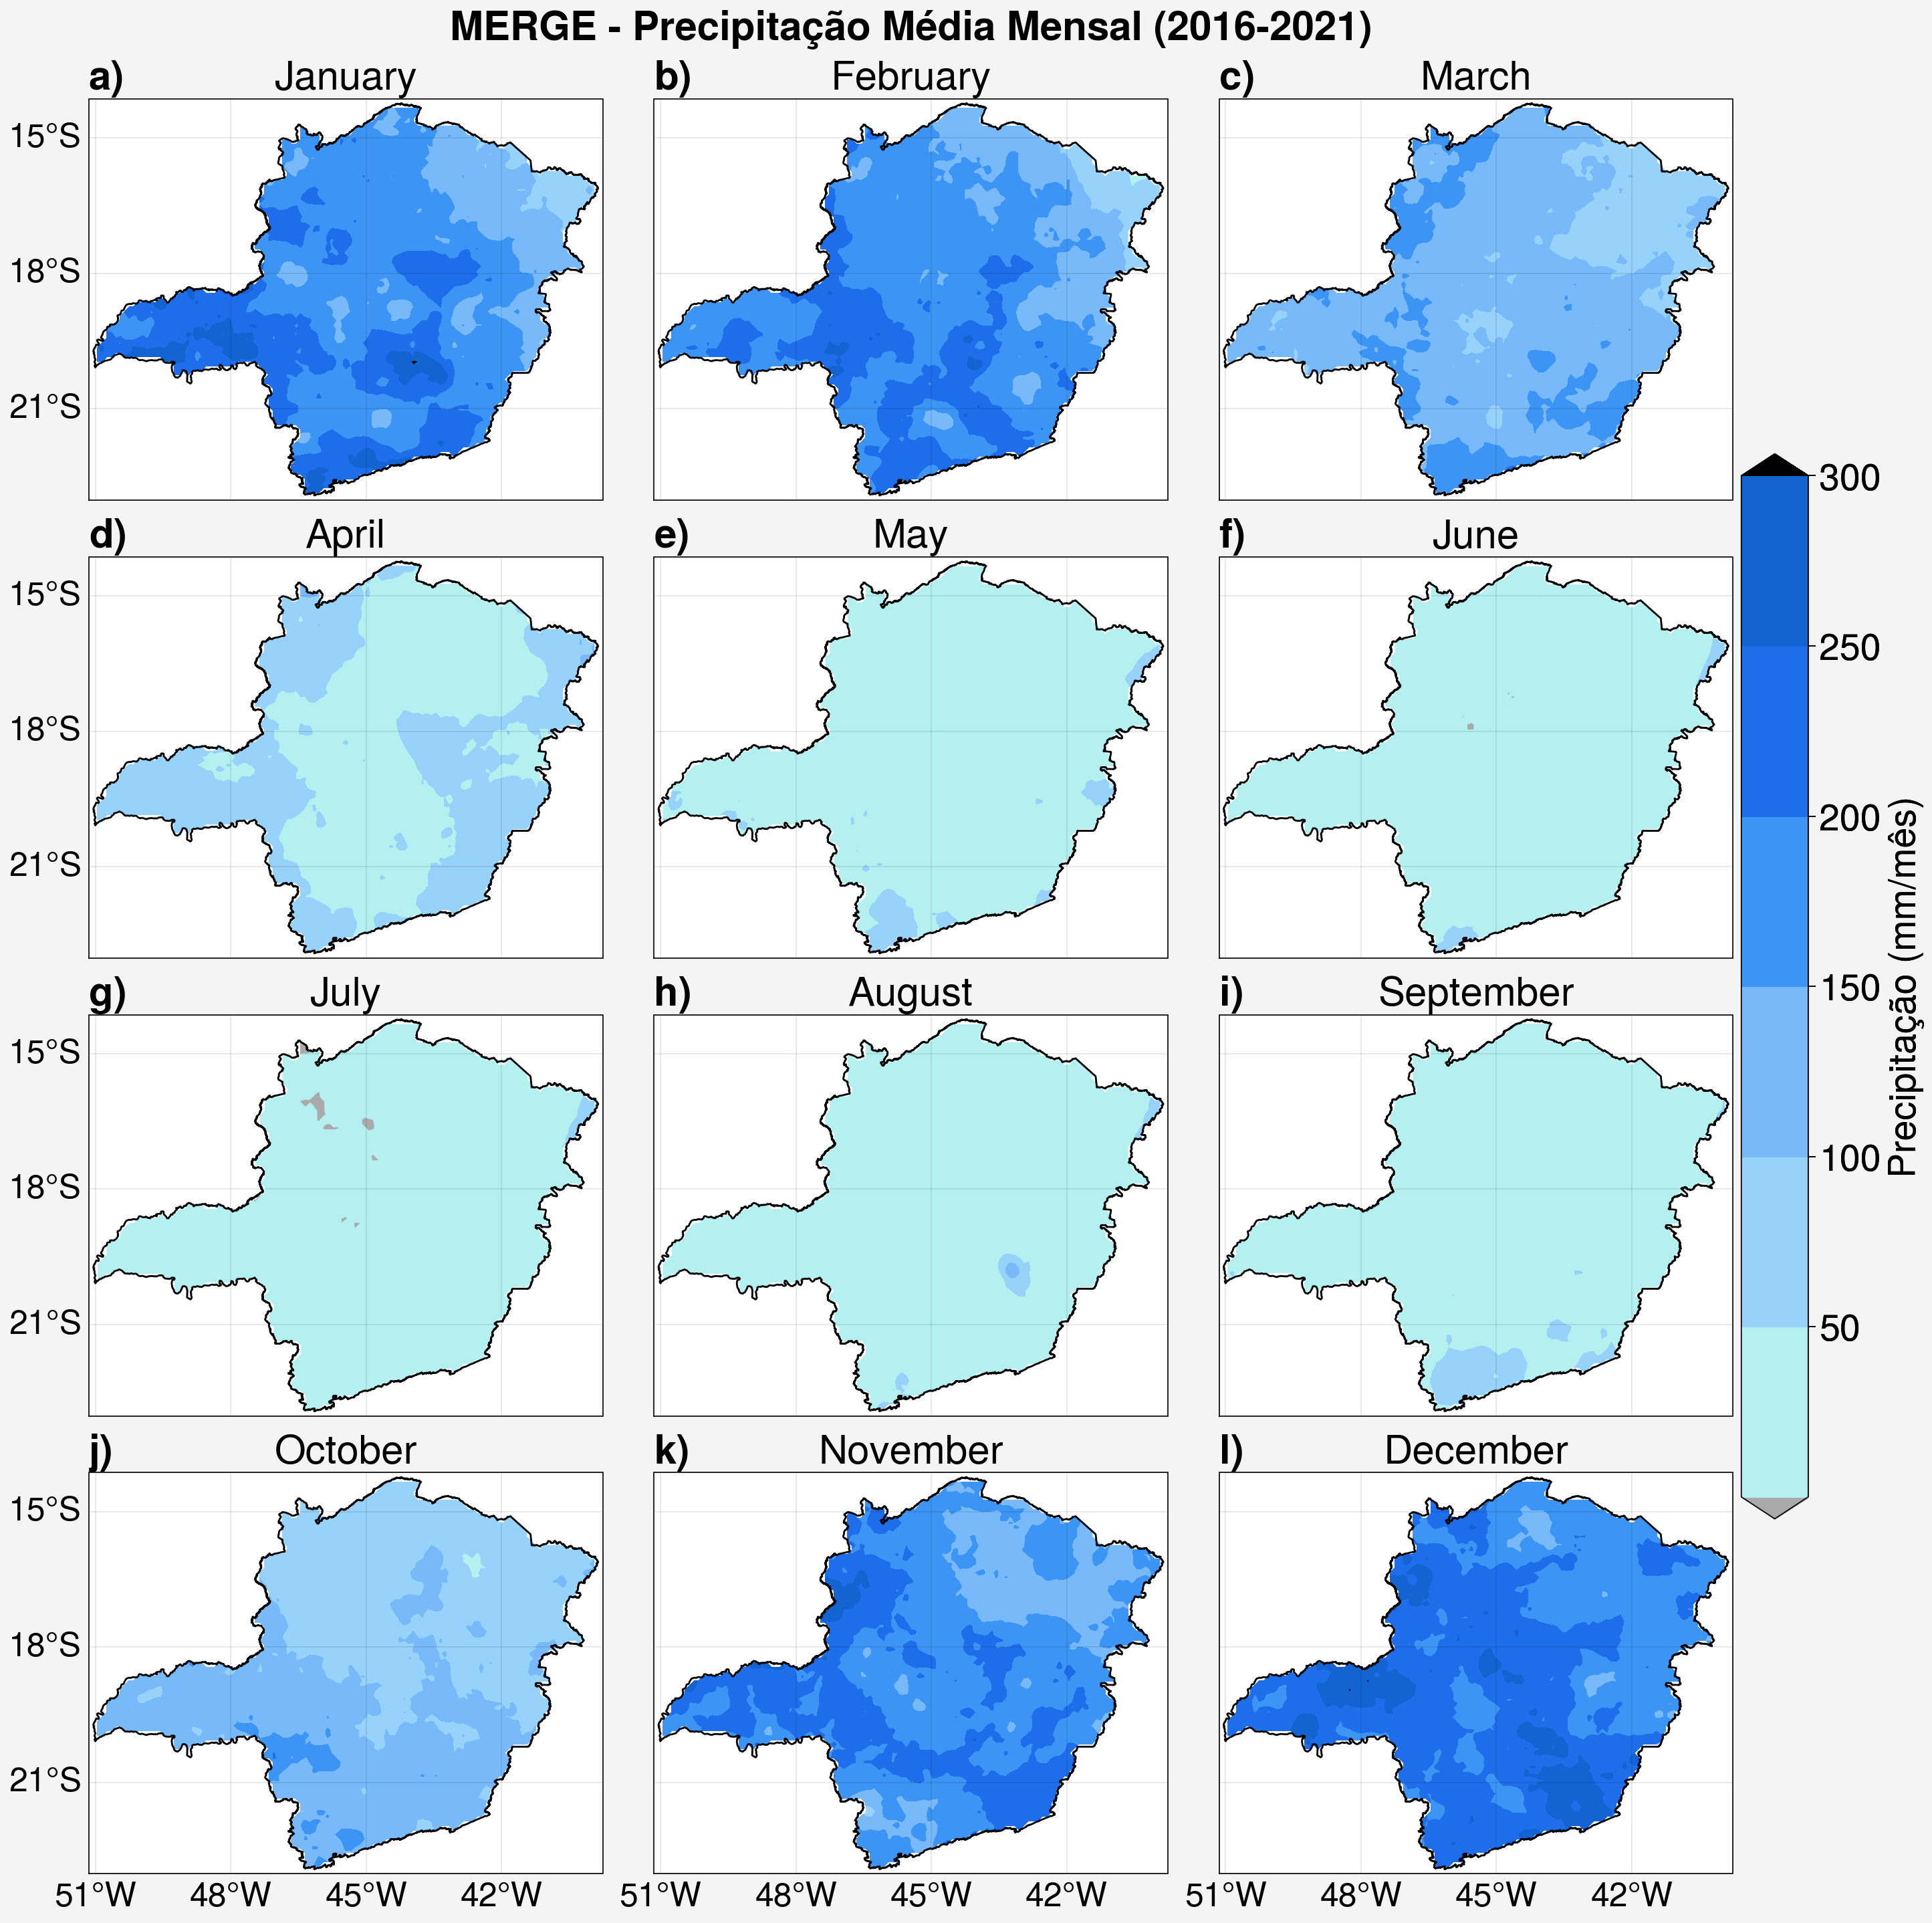

In [ ]:
# cria a moldura da figura
fig, ax = plot.subplots(ncols=3, nrows=4, axheight=3, tight=True, proj='pcarree', sharex=True, sharey=True)

# formatação dos eixos
ax.format(coast=False, borders=False, innerborders=False,
          latlines=3, lonlines=3,
          latlim=(latmin-0.10, latmax+0.10), lonlim=(lonmin-0.10, lonmax+0.10),
          suptitle=f'MERGE - Precipitação Média Mensal ({ano_inicial}-{ano_final})',
          abc=True, abcstyle='a)', abcsize=5,
          small='25px', large='30px')

# loop dos meses
for m in np.arange(0, 12):

    # nome do mês
    mes = str(m+1).zfill(2)

    # plota figura
    if m == 0:
        map1 = ax[m].contourf(chuva_media_mensal['lon'],
                              chuva_media_mensal['lat'],
                              chuva_media_mensal[m,:,:],
                              cmap=cmap,
                              levels=plot.arange(0.01, 300, 50),
                              extend='both')
    else:
        ax[m].contourf(chuva_media_mensal['lon'],
                       chuva_media_mensal['lat'],
                       chuva_media_mensal[m,:,:],
                       cmap=cmap,
                       levels=plot.arange(0.01, 300, 50),
                       extend='both')

    # plota titulo de cada figura
    if (m==1 or m==2 or m==4 or m==5 or m==7 or m==8): ax[m].format(title=calendar.month_name[int(m+1)], labels=False)
    if (m==10 or m==11): ax[m].format(title=calendar.month_name[int(m+1)], labels=[False, False, True, False])
    if (m==0 or m==3 or m==6): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, False, False])
    if (m==9): ax[m].format(title=calendar.month_name[int(m+1)], labels=[True, False, True, False])

    # plota contorno do Estado de MG
    shapefile = list(shpreader.Reader(f'/content/{sigla_estado}_UF_2019.shp').geometries())
    ax[m].add_geometries(shapefile, ccrs.PlateCarree(), edgecolor='black',facecolor='none', linewidth=1.0)

# plota barra de cores da figura
fig.colorbar(map1, loc='r', orientation='vertical', label='Precipitação (mm/mês)', ticks=50, ticklabelsize=20, labelsize=20, space=0.5, length=0.60, width=0.5)

# salva figura
fig.savefig(f'{dir}output/Fig_7_MERGE_media_mensal.png', dpi=300)